In [1]:
import matplotlib.pyplot as plt

# for reloading of modules
import importlib
from helpers import bohmian_integrator
from helpers import logging, physics2dsim_split_spin, plotting_spin, video_spin, data
from helpers import bohmian_plotter
from helpers import larmor_clock

def reload_modules():
	importlib.reload(logging)
	
	importlib.reload(physics2dsim_split_spin)
	importlib.reload(plotting_spin)
	importlib.reload(video_spin)
	importlib.reload(data)
	importlib.reload(bohmian_integrator)
	importlib.reload(bohmian_plotter)
	importlib.reload(larmor_clock)

# Call this whenever you need to reload the modules
reload_modules()

# Then your regular imports
from helpers.logging import *
from helpers.physics2dsim_split_spin import simulate_2d_spin
from helpers.plotting_spin import plot_simulation_heatmaps_spin
from helpers.video_spin import create_animation_spin
from helpers.data import *
from helpers.bohmian_integrator import *
from helpers.bohmian_plotter import *
from helpers.larmor_clock import *

In [10]:
data_sets = {
	"circular_barrier": {
		0.5: "simulation_20250426_20-40_512_step_0.01_quantum_evolution_circular_mag_barrier_strength_0.5.pkl",
		1: "simulation_20250426_20-07_512_step_0.01_quantum_evolution_circular_mag_barrier_strength_1.0.pkl",
		2: "simulation_20250425_00-41-step_0.01_quantum_evolution_circular_mag_barrier_strength_2.0.pkl",
		4: "simulation_20250425_00-55step_0.01_quantum_evolution_circular_mag_barrier_strength_4.0.pkl",
		6: "simulation_20250511_12-07_512_circular_mag_strength_6.pkl",
		8: "simulation_20250425_01-09step_0.01_quantum_evolution_circular_mag_barrier_strength_8.0.pkl",
		10: "simulation_20250511_12-50_512_circular_mag_strength_10.pkl",
		12: "simulation_20250511_13-16_512_circular_mag_strength_12.pkl",
		16: "simulation_20250425_01-22step_0.01_quantum_evolution_circular_mag_barrier_strength_16.0.pkl",
		18: "simulation_20250511_03-35_512_circular_mag_strength_18.pkl",
		19: "simulation_20250511_03-53_512_circular_mag_strength_19.pkl",
		20: "simulation_20250511_04-11_512_circular_mag_strength_20.pkl",
		21: "simulation_20250511_04-32_512_circular_mag_strength_21.pkl",
		24: "simulation_20250511_04-47_512_circular_mag_strength_24.pkl",
		26: "simulation_20250511_05-02_512_circular_mag_strength_26.pkl",
		28: "simulation_20250511_05-19_512_circular_mag_strength_28.pkl",
		30: "simulation_20250511_05-35_512_circular_mag_strength_30.pkl",
		32: "simulation_20250425_01-33step_0.01_quantum_evolution_circular_mag_barrier_strength_32.0.pkl",
	},
	"gaussian_barrier": {
		0.5: "simulation_20250427_22-10_512_gaussian_mag_strength_0.5.pkl",
		1: "simulation_20250427_22-46_512_gaussian_mag_strength_1.pkl",
		2: "simulation_20250425_13-47step_0.01_quantum_evolution_gaussian_mag_barrier_strength_2.0.pkl",
		4: "simulation_20250424_23-14_512_step_0.01_quantum_evolution_gaussian_mag_barrier_strength_4.0.pkl",
		6: "simulation_20250511_11-29_512_gaussian_mag_strength_6.pkl",
		8: "simulation_20250425_13-58_step_0.01_quantum_evolution_gaussian_mag_barrier_strength_8.0.pkl",
		10: "simulation_20250511_11-47_512_gaussian_mag_strength_10.pkl",
		12: "simulation_20250427_23-17_512_gaussian_mag_strength_12.pkl",
		16: "simulation_20250424_23-23_512_step_0.01_quantum_evolution_gaussian_mag_barrier_strength_16.0.pkl",
		18: "simulation_20250511_01-05_512_gaussian_mag_strength_18.pkl",
		19: "simulation_20250511_01-26_512_gaussian_mag_strength_19.pkl",
		20: "simulation_20250511_01-46_512_gaussian_mag_strength_20.pkl",
		21: "simulation_20250511_02-06_512_gaussian_mag_strength_21.pkl",
		22: "simulation_20250427_23-39_512_gaussian_mag_strength_22.pkl",
		24: "simulation_20250511_02-25_512_gaussian_mag_strength_24.pkl",
		26: "simulation_20250511_02-41_512_gaussian_mag_strength_26.pkl",
		28: "simulation_20250511_03-01_512_gaussian_mag_strength_28.pkl",
		30: "simulation_20250511_03-15_512_gaussian_mag_strength_30.pkl",
		32: "simulation_20250424_23-30_512_step_0.01_quantum_evolution_gaussian_mag_barrier_strength_32.0.pkl",
	}
} 

This is the plan - 50/50 super position
1) Load data
	1) calculate bohmian trajectories from each file, then save them into a seperate pickle for future retrieval
	2) Calculate precession angle data for each simulation, then store it
2) Load individual bohmian trajectories, then analyze barrier passage right before particle reaches frame end (frame 250)
	1) For Circular Barrier, we can use exact distances from center
	2) For Gaussian Barrier, use a spread from 1 to 4 sigma
3) Load precession angles, then obtain larmor clock out of them

Then do the same for Spin up only, And perhaps pi/6 pi/4 pi/3 super positions of spin up and down.

Then compile and plot the results into graphics for analysis.

In [35]:
data_results = {
	"circular_barrier": {
		"bohmian_trajectories": {

		},
		"precession": {
			
		},
	},
	"gaussian_barrier": {
		"bohmian_trajectories": {
			1: {},
			2.3548200450309493: {},
			2: {},
			3: {},
		},
		"precession": {

		}
	},
}

## Testing out single thingy

In [70]:
import math

fwhm_factor = 2*math.sqrt(2*math.log(2))
fwhm_factor

2.3548200450309493

In [4]:
# with weak magnetic barrier
simulation_data, params, timestamp =  load_simulation_data(f'./simulations_data/spin/{data_sets["circular_barrier"][12]}')

In [125]:
trajectories = compute_bohmian_trajectories(simulation_data, params,
										   alpha=1/np.sqrt(2),
										   beta =1/np.sqrt(2),
										   n_trajectories=200, random_seed=777)

CFL parameter: 21051.363631746768
C after fix = 0.2499983805399469


Average time inside barrier: 0.170 (same units as t)


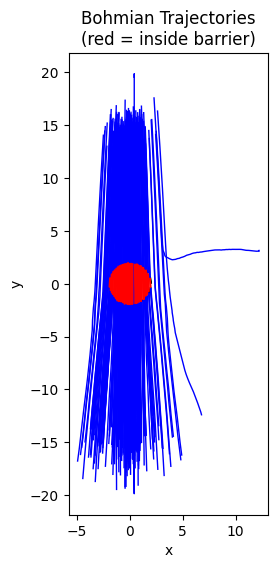

In [126]:
# Example usage (assuming `traj` and `t` are defined from your code):
t = simulation_data['t']
mag_barrier_strength = params['mag_barrier_strength']

sigma = 1

# Define barrier radius (e.g. 0.5 times your magnetic barrier size)
R = 1/2*params['mag_barrier_width']  # replace barrier_radius_value with your actual radius
inside_mask, times_inside, avg_time_inside = analyze_barrier_passage(trajectories, t, R)

print(f"Average time inside barrier: {avg_time_inside:.3f} (same units as t)")

# Plot trajectories with inside segments in red
fig, ax = plot_trajectories_with_barrier(trajectories, inside_mask, R)

# Plot density of points inside
# plot_density_inside(trajectories_2, inside_mask, bins=150)

# Save with high DPI
fig.savefig(f'./results/bohmian_trajectories/circular_barrier_strength_{mag_barrier_strength}.png', dpi=300, bbox_inches='tight')

# Or if you want to show it after saving
plt.show()

# Don't forget to close the figure to free memory
plt.close(fig)

In [129]:
np.std(times_inside)

0.0781662331189114

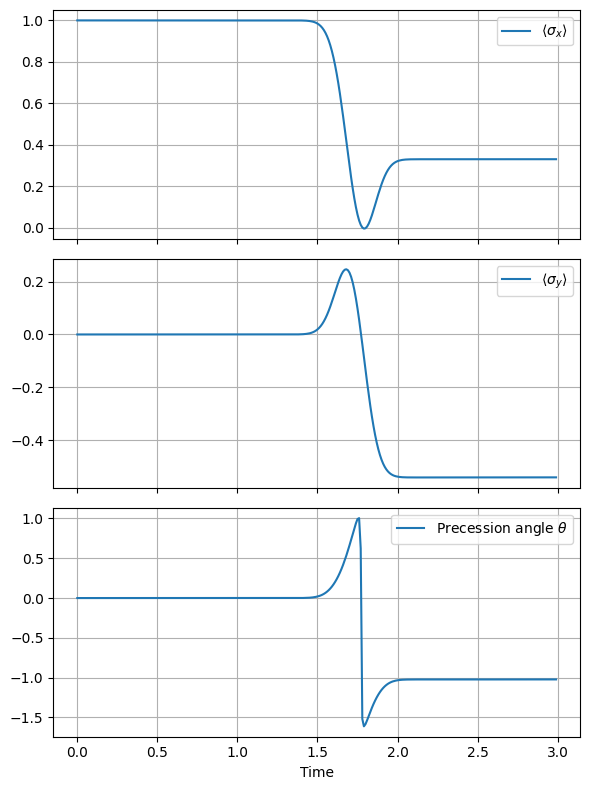

In [11]:
# we've stored wavefunction arrays in simulation_data["psi_up_list"], etc.
dx = (simulation_data["x"][1] - simulation_data["x"][0])
dy = (simulation_data["y"][1] - simulation_data["y"][0])

precession_result = measure_precession_angle(
	simulation_data, dx=dx, dy=dy, hbar=1.0, calc_sz=True
)

t_array, sx_array, sy_array, sz_array, theta_array = precession_result

fig, axs = plot_precession(t_array, sx_array, sz_array, theta_array)

# Save with high DPI
# fig.savefig(f'./results/spin_precession/circular_barrier_strength_{mag_barrier_strength}.png', dpi=300, bbox_inches='tight', dpi=300, bbox_inches='tight')

# If you want to display it after saving
plt.show()

# Clean up
plt.close(fig)

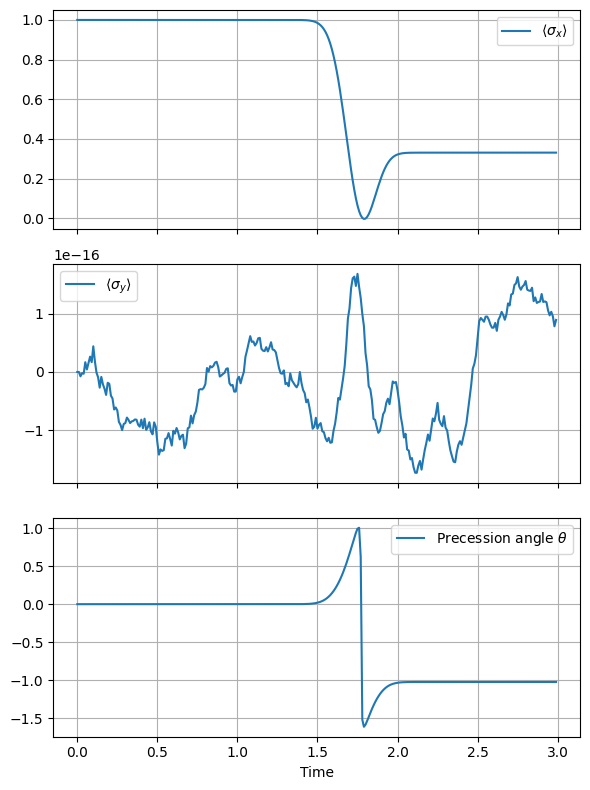

In [12]:
fig, axs = plot_precession(t_array, sx_array, sz_array, np.unwrap(theta_array))

# Save with high DPI
# fig.savefig(f'./results/spin_precession/circular_barrier_strength_{mag_barrier_strength}.png', dpi=300, bbox_inches='tight', dpi=300, bbox_inches='tight')

# If you want to display it after saving
plt.show()

# Clean up
plt.close(fig)

In [143]:
total_precession = np.sum(np.abs(np.diff(theta_array)))

4.208062596741354

In [131]:
w_l = calc_larmor_frequency(params)
print (f"Larmor frequency: {w_l} rad/time unit, or {w_l/(2*np.pi)} Hz")

tau = theta_array[-1] / calc_larmor_frequency(params)
print (f"tau = {tau }")

Larmor frequency: 24.0 rad/time unit, or 3.819718634205488 Hz
tau = -0.04259369858276899


# Automate #1

In [18]:
data_results = {
	"circular_barrier": {
		"bohmian_trajectories": {

		},
		"precession": {
			
		},
	},
	"gaussian_barrier": {
		"bohmian_trajectories": {
			1: {},
			2.3548200450309493: {},
			2: {},
			3: {},
		},
		"precession": {

		}
	},
}

In [ ]:
for mag_barrier_strength, filename in data_sets["circular_barrier"].items():
	print(f"Analyzing barrier strength: {mag_barrier_strength}")

	# retrieve simulation
	simulation_data, params, timestamp = load_simulation_data(f'./simulations_data/spin/{filename}')

	# calculate bohmian trajectories
	trajectories = compute_bohmian_trajectories(simulation_data, params,
										   alpha=1/np.sqrt(2),
										   beta=1/np.sqrt(2),
										   n_trajectories=200, random_seed=45000)

	t = simulation_data['t']
	dx = (simulation_data["x"][1] - simulation_data["x"][0])
	dy = (simulation_data["y"][1] - simulation_data["y"][0])

	# ...
	R = 1/2*params['mag_barrier_width']  # replace barrier_radius_value with your actual radius

	# analyze barrier passage
	inside_mask, times_inside, avg_time_inside = analyze_barrier_passage(trajectories, t, R)
	print(f"Average time inside barrier: {avg_time_inside:.3f} (same units as t)")

	# Store results and free memory for trajectories analysis
	data_results["circular_barrier"]["bohmian_trajectories"][mag_barrier_strength] = {
		"times_inside": times_inside,
		"avg_time_inside": avg_time_inside
	}

	# plot trajectories and free memory
	fig, ax = plot_trajectories_with_barrier(trajectories, inside_mask, R)
	fig.savefig(f'./results/bohmian_trajectories/circular_barrier_strength_{mag_barrier_strength}.png', dpi=300, bbox_inches='tight')
	plt.close(fig)  # Clean up
	del trajectories, inside_mask, times_inside  # Free trajectory-related memory

	# precession
	precession_result = measure_precession_angle(
		simulation_data, dx=dx, dy=dy, hbar=1.0
	)
	# Free the large simulation data as it's no longer needed
	del simulation_data, t, dx, dy

	t_array, sx_array, sy_array, theta_array = precession_result
	del precession_result  # Free the tuple since we've unpacked it

	# Plot precession and free figure memory
	fig, axs = plot_precession(t_array, sx_array, sy_array, theta_array)
	fig.savefig(f'./results/spin_precession/circular_barrier_strength_{mag_barrier_strength}.png', dpi=300, bbox_inches='tight')
	plt.close(fig)  # Clean up

	# calculate larmor frequency
	w_l = calc_larmor_frequency(params)
	print(f"Larmor frequency: {w_l} rad/time unit, or {w_l/(2*np.pi)} Hz")

	# calculate tau
	tau = theta_array[-1] / calc_larmor_frequency(params)
	print(f"tau = {tau}")

	# save precession data and clean up remaining arrays
	data_results["circular_barrier"]["precession"][mag_barrier_strength] = {
		"t_array": t_array,
		"sx_array": sx_array,
		"sy_array": sy_array,
		"theta_array": theta_array,
		"time": tau
	}
	
	# Clean up remaining large arrays after storing results
	del t_array, sx_array, sy_array, theta_array, params

Analyzing barrier strength: 0.1


In [62]:
import pickle
import datetime
import os

# # Create filename
# timestamp = datetime.datetime.now().strftime("%Y%m%d_%H-%M")
# filename = os.path.join('./results/data', f'circular_barrier_resulting_larmor_precession{timestamp}.pkl')

# # # Save to pickle file
# with open(filename, 'wb') as f:
# 	pickle.dump(data_results, f)

# Load the data
filename = os.path.join('./results/data', f'circular_barrier_resulting_larmor_precession20250512_12-04.pkl')
data_results = pickle.load(open(filename, 'rb'))

In [63]:
# prepare data
data_bohmian = []
data_bohmian_std = []
for k, v in data_results['circular_barrier']['bohmian_trajectories'].items():
	
	times = v['times_inside'].mean()
	std = v['times_inside'].std()

	data_bohmian.append([k, times])
	data_bohmian_std.append([k, std])

/var/folders/yj/gnbff_r55s7fw6ylhj7q526r0000gn/T/ipykernel_23337/1381773018.py:7: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(x, y, yerr=y_std, marker='o', capsize=5, capthick=1,


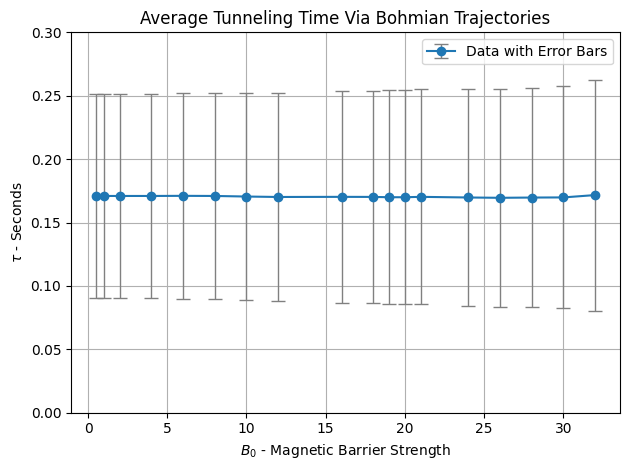

In [64]:
# prepare data
data_bohmian = []
data_bohmian_std = []
for k, v in data_results['circular_barrier']['bohmian_trajectories'].items():
	
	times = v['times_inside'].mean()
	std = v['times_inside'].std()

	data_bohmian.append([k, times])
	data_bohmian_std.append([k, std])

# Data provided by the user
x, y = zip(*data_bohmian)
x_std, y_std = zip(*data_bohmian_std)

# Create the plot
plt.figure()
plt.errorbar(x, y, yerr=y_std, marker='o', capsize=5, capthick=1, 
             ecolor='gray', elinewidth=1, fmt='-o', label='Data with Error Bars')
plt.xlabel('$B_0$ - Magnetic Barrier Strength')
plt.ylabel('$\\tau$ - Seconds')
plt.ylim(0, 0.3)
plt.title('Average Tunneling Time Via Bohmian Trajectories')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [66]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
data = []
for k, v in data_results['circular_barrier']['precession'].items():
	
	# time = v['time']
	# print(k, time)
	# data.append([k, time])

	mag_barrier = k

	# time = v['time']
	theta_array = np.unwrap(v['theta_array'][:250])

	# calculate larmor frequency
	w_l = 2 * k / 1 # hbar = 1
	print(f"Larmor frequency: {w_l} rad/time unit, or {w_l/(2*np.pi)} Hz")

	# calculate tau
	total_precession = np.sum(np.abs(np.diff(theta_array)))

	tau = total_precession / w_l
	print(f"tau = {tau} - {(total_precession)}")

	print(k, tau)
	data.append([k, tau])

Larmor frequency: 1.0 rad/time unit, or 0.15915494309189535 Hz
tau = 0.17276101594101842 - 0.17276101594101842
0.5 0.17276101594101842
Larmor frequency: 2.0 rad/time unit, or 0.3183098861837907 Hz
tau = 0.17308876371446544 - 0.3461775274289309
1 0.17308876371446544
Larmor frequency: 4.0 rad/time unit, or 0.6366197723675814 Hz
tau = 0.17442976061986573 - 0.6977190424794629
2 0.17442976061986573
Larmor frequency: 8.0 rad/time unit, or 1.2732395447351628 Hz
tau = 0.18026869264021603 - 1.4421495411217282
4 0.18026869264021603
Larmor frequency: 12.0 rad/time unit, or 1.909859317102744 Hz
tau = 0.19138404175355328 - 2.2966085010426394
6 0.19138404175355328
Larmor frequency: 16.0 rad/time unit, or 2.5464790894703255 Hz
tau = 0.20669205979133565 - 3.3070729566613704
8 0.20669205979133565
Larmor frequency: 20.0 rad/time unit, or 3.183098861837907 Hz
tau = 0.21760917330544202 - 4.3521834661088405
10 0.21760917330544202
Larmor frequency: 24.0 rad/time unit, or 3.819718634205488 Hz
tau = 0.1753182

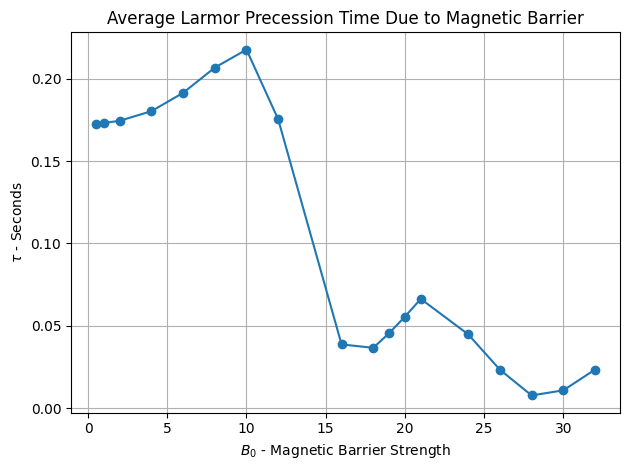

In [68]:
# Data provided by the user
x, y = zip(*data)

# Create the plot
plt.figure()
plt.plot(x, y, marker='o')
plt.xlabel('$B_0$ - Magnetic Barrier Strength')
plt.ylabel('$\\tau$ - Seconds')
plt.title('Average Larmor Precession Time Due to Magnetic Barrier')
plt.grid(True)
plt.tight_layout()

plt.show()



/var/folders/yj/gnbff_r55s7fw6ylhj7q526r0000gn/T/ipykernel_23337/2704099606.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(x_bohmian, y_bohmian, yerr=y_bohmian_std, marker='o', capsize=5, capthick=1,


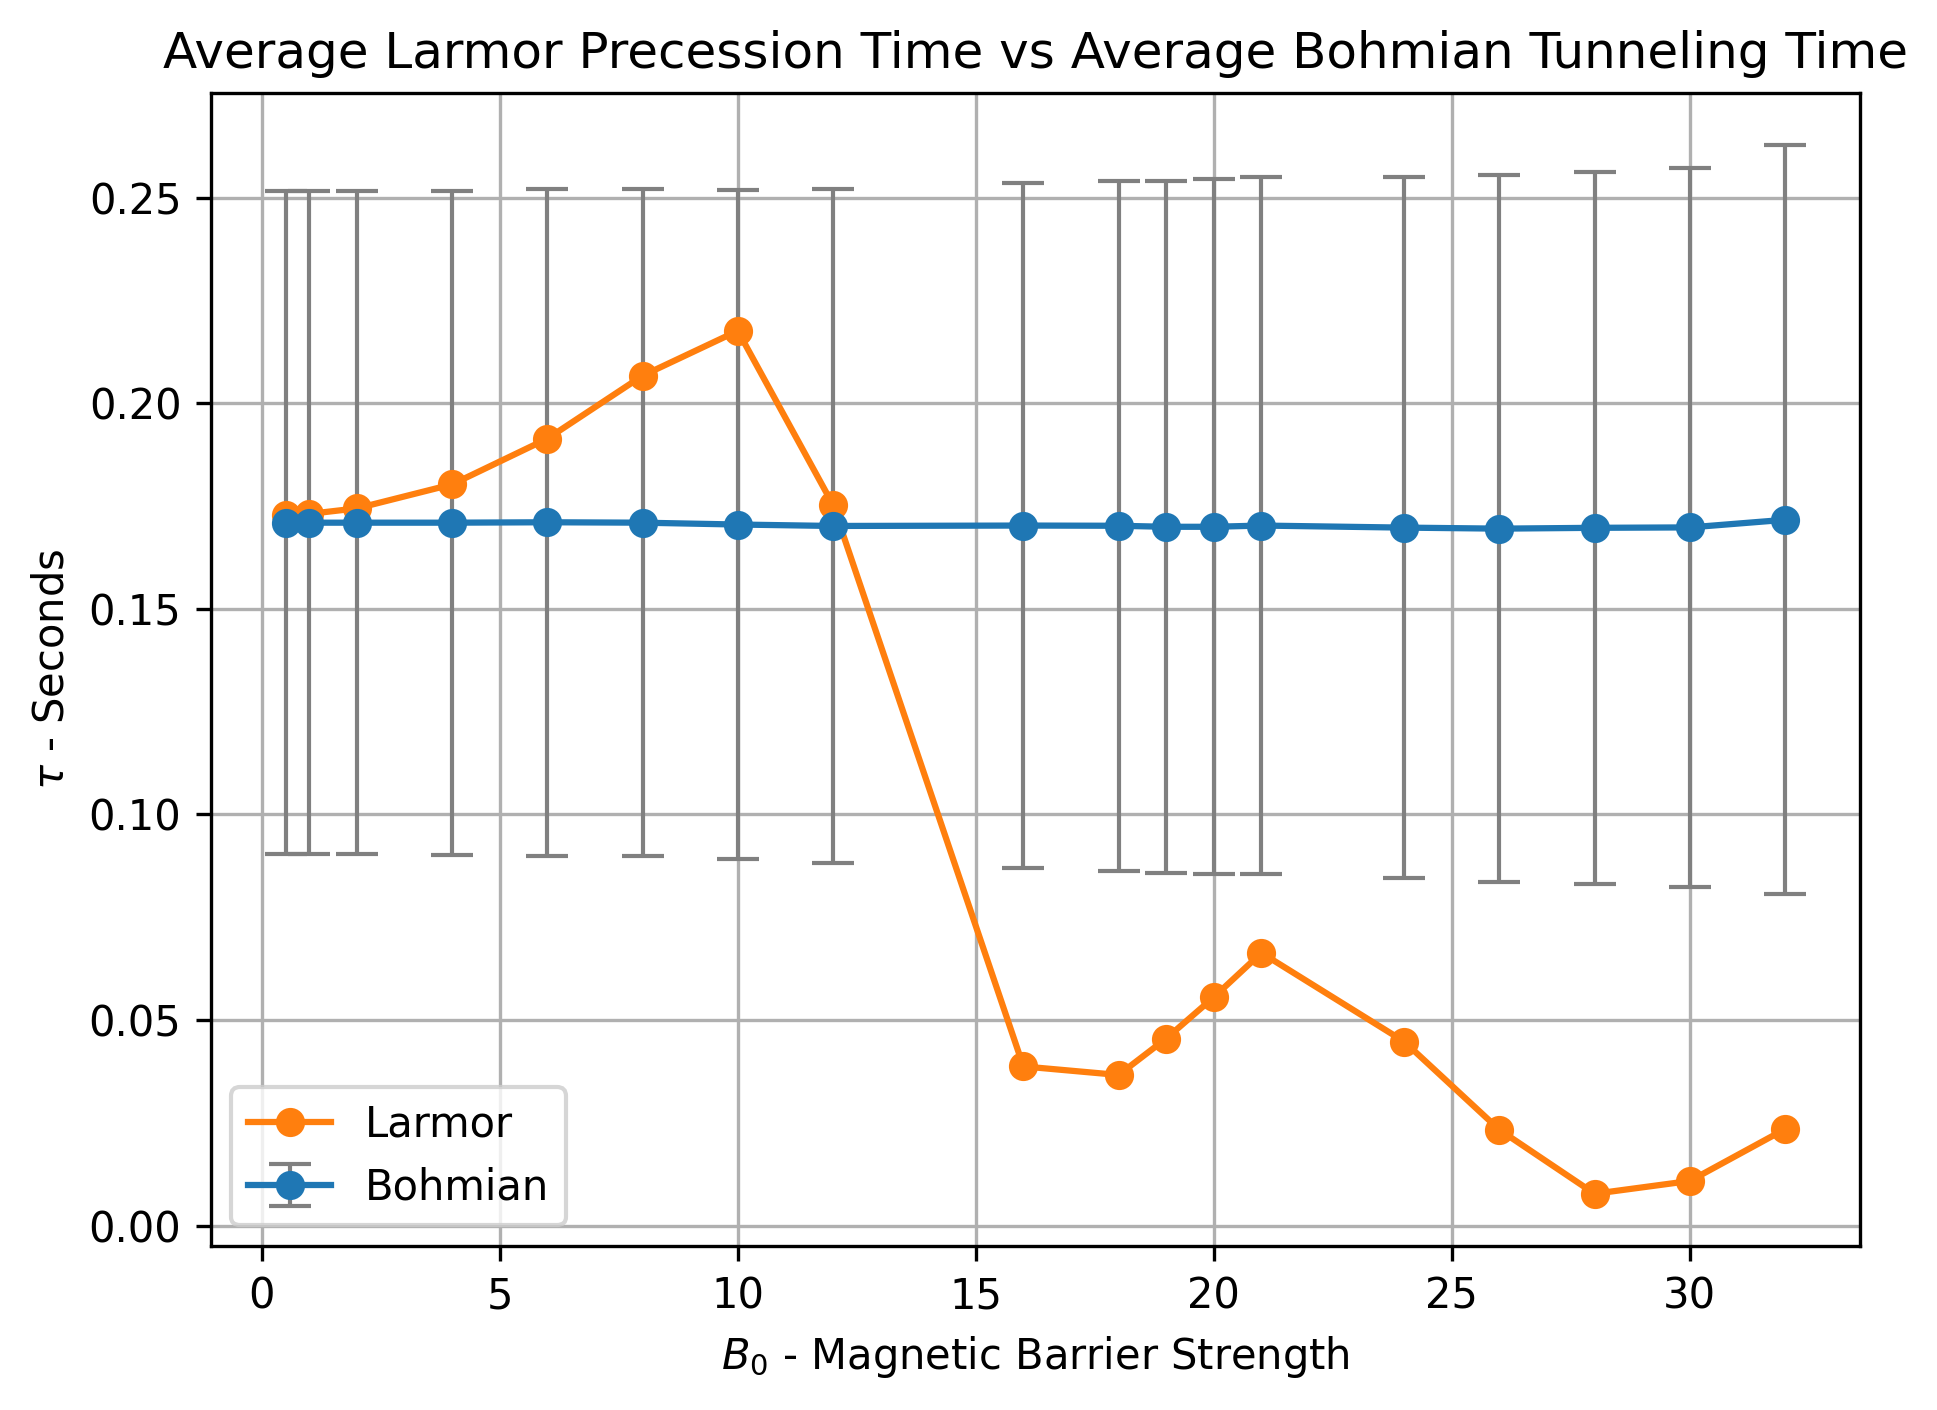

In [69]:
# together
# Data provided by the user
x_bohmian, y_bohmian = zip(*data_bohmian)
x_bohmian_std, y_bohmian_std = zip(*data_bohmian_std)
x_larmor, y_larmor = zip(*data)

# Create the plot
plt.figure(dpi=300)
plt.errorbar(x_bohmian, y_bohmian, yerr=y_bohmian_std, marker='o', capsize=5, capthick=1, 
             ecolor='gray', elinewidth=1, fmt='-o', label='Bohmian')
plt.plot(x_larmor, y_larmor, marker='o', label='Larmor')
plt.xlabel('$B_0$ - Magnetic Barrier Strength')
plt.ylabel('$\\tau$ - Seconds')
plt.title('Average Larmor Precession Time vs Average Bohmian Tunneling Time')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()


## Testing Avg Larmor

In [76]:
print (data_sets["gaussian_barrier"][2])

# retrieve simulation
filename = data_sets["gaussian_barrier"][2]
# del simulation_data, params, timestampb
simulation_data, params, timestamp = load_simulation_data(f'./simulations_data/spin/{filename}')

t = simulation_data['t']
dx = (simulation_data["x"][1] - simulation_data["x"][0])
dy = (simulation_data["y"][1] - simulation_data["y"][0])

simulation_20250425_13-47step_0.01_quantum_evolution_gaussian_mag_barrier_strength_2.0.pkl


In [77]:
# precession
precession_result = measure_precession_angle(
	simulation_data, dx=dx, dy=dy, hbar=1.0
)
# Free the large simulation data as it's no longer needed
# del simulation_data, t, dx, dy

t_array, sx_array, sy_array, theta_array = precession_result
# del precession_result  # Free the tuple since we've unpacked it

# calculate larmor frequency
w_l = calc_larmor_frequency(params)
print(f"Larmor frequency: {w_l} rad/time unit, or {w_l/(2*np.pi)} Hz")

# calculate average magnetic barrier strength, and average larmor frequency

# calculate tau
tau = theta_array[-1] / calc_larmor_frequency(params)
print(f"tau = {tau}")

# Clean up remaining large arrays after storing results
# del t_array, sx_array, sy_array, theta_array, params

Larmor frequency: 4.0 rad/time unit, or 0.6366197723675814 Hz
tau = 0.5813572016864054


In [78]:
# pick two frames that bracket the “packet fully in the barrier” period
t0_idx, t1_idx = 160, 190

B_avg, omega_avg = weighted_B_and_larmor(simulation_data, params,
                                         t0_idx, t1_idx, hbar=1.0)

print(f"⟨B⟩  = {B_avg:.5f}  (simulation field units)")
print(f"⟨ω_L⟩ = {omega_avg:.5f}  rad / time-unit")


⟨B⟩  = 1.68818  (simulation field units)
⟨ω_L⟩ = 3.37637  rad / time-unit


In [79]:
# calculate tau
tau = (theta_array[250] - theta_array[0]) / omega_avg
print(f"tau = {tau}")

tau_2 = np.sum(np.abs(np.diff(theta_array))) / omega_avg
print(f"tau 2 = {tau}")

tau = 0.6814245800624756
tau 2 = 0.6814245800624756


I'm going to try frame weighted stuff now

In [114]:
B_avg_array, omega_avg_array = frame_weighted_B_and_larmor(simulation_data, params, hbar=1.0)

In [119]:
weighted_taus = np.abs(np.diff(theta_array[:251])) / omega_avg_array[:250]
np.sum(weighted_taus)

2.5014401037349625

## Automation And Analysis of Gaussian Nature

In [89]:
data_results_gaussian = {
	"gaussian_barrier": {
		"bohmian_trajectories": {
			1: {},
			2.3548200: {},  # FWHM
			2: {},
			3: {},
		},
		"precession": {

		}
	},
}

In [103]:
for mag_barrier_strength, filename in data_sets["gaussian_barrier"].items():
	print(f"Analyzing barrier strength: {mag_barrier_strength}")

	# retrieve simulation
	simulation_data, params, timestamp = load_simulation_data(f'./simulations_data/spin/{filename}')

	# calculate bohmian trajectories
	trajectories = compute_bohmian_trajectories(simulation_data, params,
										   alpha=1/np.sqrt(2),
										   beta=1/np.sqrt(2),
										   n_trajectories=200, random_seed=777)

	t = simulation_data['t']
	dx = (simulation_data["x"][1] - simulation_data["x"][0])
	dy = (simulation_data["y"][1] - simulation_data["y"][0])

	# analyze barrier passage
	for sigma_multiplier in data_results_gaussian["gaussian_barrier"]["bohmian_trajectories"].keys():
		R = sigma_multiplier*params['mag_barrier_width'] / 2
		inside_mask, times_inside, avg_time_inside = analyze_barrier_passage(trajectories, t, R)
		print(f"Average time inside barrier: {avg_time_inside:.3f} (same units as t)")

		# Store results and free memory for trajectories analysis
		data_results_gaussian["gaussian_barrier"]["bohmian_trajectories"][sigma_multiplier][mag_barrier_strength] = {
			"times_inside": times_inside,
			"avg_time_inside": avg_time_inside
		}

		# plot trajectories and free memory
		fig, ax = plot_trajectories_with_barrier(trajectories, inside_mask, R)
		fig.savefig(f'./results/bohmian_trajectories/gaussian_barrier_strength_{mag_barrier_strength}_R_{R}.png', dpi=300, bbox_inches='tight')
		plt.close(fig)  # Clean up

	del trajectories, inside_mask, times_inside  # Free trajectory-related memory

	# precession
	precession_result = measure_precession_angle(
		simulation_data, dx=dx, dy=dy, hbar=1.0
	)
	# Free the large simulation data as it's no longer needed

	t_array, sx_array, sy_array, theta_array = precession_result
	del precession_result  # Free the tuple since we've unpacked it

	# Plot precession and free figure memory
	fig, axs = plot_precession(t_array, sx_array, sy_array, theta_array)
	fig.savefig(f'./results/spin_precession/gaussian_barrier_strength_{mag_barrier_strength}.png', dpi=300, bbox_inches='tight')
	plt.close(fig)  # Clean up

	# calculate larmor frequency
	w_l = calc_larmor_frequency(params)
	print(f"Larmor frequency: {w_l} rad/time unit, or {w_l/(2*np.pi)} Hz")

	# calculate tau
	tau = theta_array[-1] / w_l
	print(f"tau = {tau}")

	# calculate average magnetic barrier strength, and average larmor frequency
	# pick two frames that bracket the “packet fully in the barrier” period
	t0_idx, t1_idx = 160, 190

	B_avg, omega_avg = weighted_B_and_larmor(simulation_data, params,
											t0_idx, t1_idx, hbar=1.0)

	print(f"⟨B⟩  = {B_avg:.5f}  (simulation field units)")
	print(f"⟨ω_L⟩ = {omega_avg:.5f}  rad / time-unit")


	# save precession data and clean up remaining arrays
	data_results_gaussian["gaussian_barrier"]["precession"][mag_barrier_strength] = {
		"t_array": t_array,
		"sx_array": sx_array,
		"sy_array": sy_array,
		"theta_array": theta_array,
		"time": tau,
		# "time_b_averaged": tau_b_averaged, # re-calculated after from theta_array anyway
		"B_avg": B_avg,
		"omega_avg": omega_avg, # of average field
		"omega_0": w_l, # of space uniform field
	}
	
	# Clean up remaining large arrays after storing results
	del simulation_data, t, dx, dy
	del t_array, sx_array, sy_array, theta_array, params

Analyzing barrier strength: 0.5
CFL parameter: 21051.363631746768
C after fix = 0.2499983805399469
Average time inside barrier: 0.170 (same units as t)
Average time inside barrier: 0.533 (same units as t)
Average time inside barrier: 0.442 (same units as t)
Average time inside barrier: 0.698 (same units as t)
Larmor frequency: 1.0 rad/time unit, or 0.15915494309189535 Hz
tau = 0.5810591186559118
⟨B⟩  = 0.42208  (simulation field units)
⟨ω_L⟩ = 0.84415  rad / time-unit
Analyzing barrier strength: 1
CFL parameter: 21051.363631746768
C after fix = 0.2499983805399469
Average time inside barrier: 0.170 (same units as t)
Average time inside barrier: 0.533 (same units as t)
Average time inside barrier: 0.442 (same units as t)
Average time inside barrier: 0.698 (same units as t)
Larmor frequency: 2.0 rad/time unit, or 0.3183098861837907 Hz
tau = 0.5811193355742157
⟨B⟩  = 0.84414  (simulation field units)
⟨ω_L⟩ = 1.68828  rad / time-unit
Analyzing barrier strength: 2
CFL parameter: 21051.363631

In [17]:
import pickle
import datetime
import os

# # Create filename
# timestamp = datetime.datetime.now().strftime("%Y%m%d_%H-%M")
# filename = os.path.join('./results/data', f'gaussian_barrier_resulting_larmor_precession{timestamp}.pkl')

# # # Save to pickle file
# with open(filename, 'wb') as f:
# 	pickle.dump(data_results_gaussian, f)

# Load the data
f = os.path.join('./results/data', 'gaussian_barrier_resulting_larmor_precession20250512_12-03.pkl')
data_results_gaussian = pickle.load(open(f, 'rb'))

In [18]:
data_results_gaussian['gaussian_barrier']['bohmian_trajectories'].keys()

dict_keys([1, 2.35482, 2, 3])

/var/folders/yj/gnbff_r55s7fw6ylhj7q526r0000gn/T/ipykernel_23337/2120699486.py:30: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(x, y, yerr=y_std, marker='o', capsize=5, capthick=1,


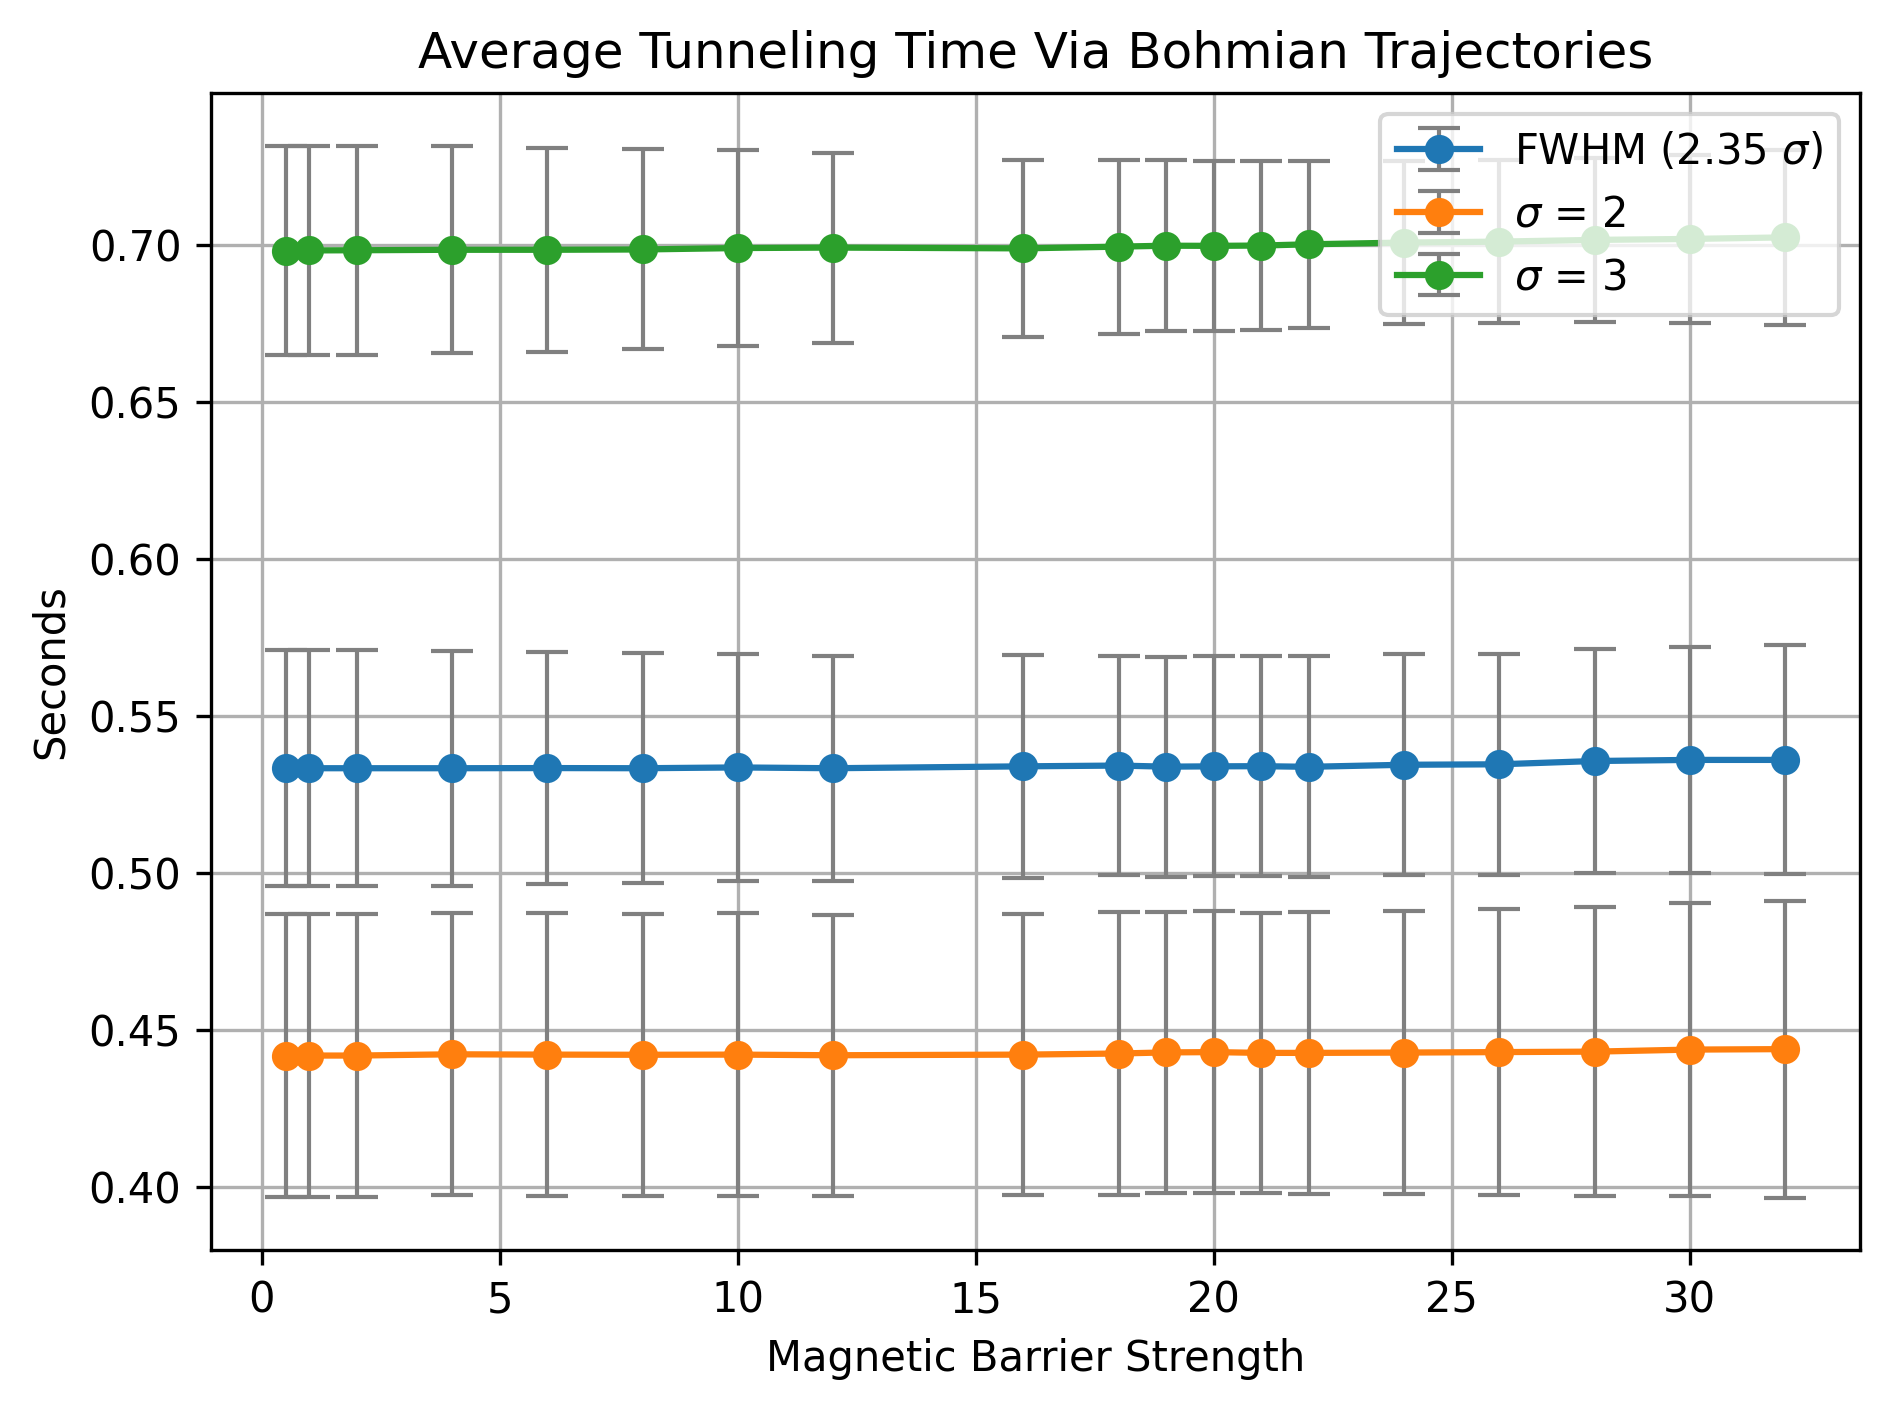

In [34]:
data_bohmian = {

}

data_bohmian_std = {

}

for sigma_factor, value in data_results_gaussian['gaussian_barrier']['bohmian_trajectories'].items():
	data_bohmian[sigma_factor] = []
	data_bohmian_std[sigma_factor] = []
	for k, v in value.items():
		time = v['avg_time_inside']
		std_bohm = np.std(v['times_inside'])
		data_bohmian[sigma_factor].append([k, time])
		data_bohmian_std[sigma_factor].append([k, std_bohm])

# Create the plot
plt.figure(dpi=300)

for d, xy in data_bohmian.items():

	if d == 1:
		continue

	x, y = zip(*xy)
	_, y_std = zip(*(data_bohmian_std[d]))

	label = 'FWHM (2.35 $\sigma$)' if d == 2.35482 else f'$\sigma$ = {d}'
	plt.errorbar(x, y, yerr=y_std, marker='o', capsize=5, capthick=1, 
             ecolor='gray', elinewidth=1, fmt='-o', label=f'{label}')
	# break

plt.xlabel('Magnetic Barrier Strength')
plt.ylabel('Seconds')
plt.title('Average Tunneling Time Via Bohmian Trajectories')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [48]:
data_larmor = []
data_larmor_avg = []
for k, v in data_results_gaussian['gaussian_barrier']['precession'].items():
	
	mag_barrier = k

	time = v['time']
	theta_array = np.unwrap(v['theta_array'][:250])

	# calculate larmor frequency
	w_l = 2 * k / 1 # hbar = 1
	print(f"Larmor frequency: {w_l} rad/time unit, or {w_l/(2*np.pi)} Hz")

	w_l_avg = v['omega_avg']

	# calculate tau

	theta_0 = np.sum(np.abs(np.diff(theta_array)))
	theta_1 = theta_array[-1] - theta_array[0]

	tau = (theta_0) / w_l
	tau_avg = (theta_0) / w_l_avg
	print(f"tau = {tau} - {(theta_array[-1] - theta_array[0])}")

	print(k, tau)
	data_larmor.append([k, tau])
	data_larmor_avg.append([k, tau_avg])


Larmor frequency: 1.0 rad/time unit, or 0.15915494309189535 Hz
tau = 0.5748436827748745 - 0.5748436827748745
0.5 0.5748436827748745
Larmor frequency: 2.0 rad/time unit, or 0.3183098861837907 Hz
tau = 0.5749099128502414 - 1.1498198257004828
1 0.5749099128502414
Larmor frequency: 4.0 rad/time unit, or 0.6366197723675814 Hz
tau = 0.5751718123666156 - 2.3006872494664625
2 0.5751718123666156
Larmor frequency: 8.0 rad/time unit, or 1.2732395447351628 Hz
tau = 0.5761720167194749 - 4.6093761337558
4 0.5761720167194749
Larmor frequency: 12.0 rad/time unit, or 1.909859317102744 Hz
tau = 0.577679003778866 - 6.932148045346393
6 0.577679003778866
Larmor frequency: 16.0 rad/time unit, or 2.5464790894703255 Hz
tau = 0.5794873719157405 - 9.271797950651848
8 0.5794873719157405
Larmor frequency: 20.0 rad/time unit, or 3.183098861837907 Hz
tau = 0.5813824243193639 - 11.62764848638728
10 0.5813824243193639
Larmor frequency: 24.0 rad/time unit, or 3.819718634205488 Hz
tau = 0.5831962458954664 - 13.99670990

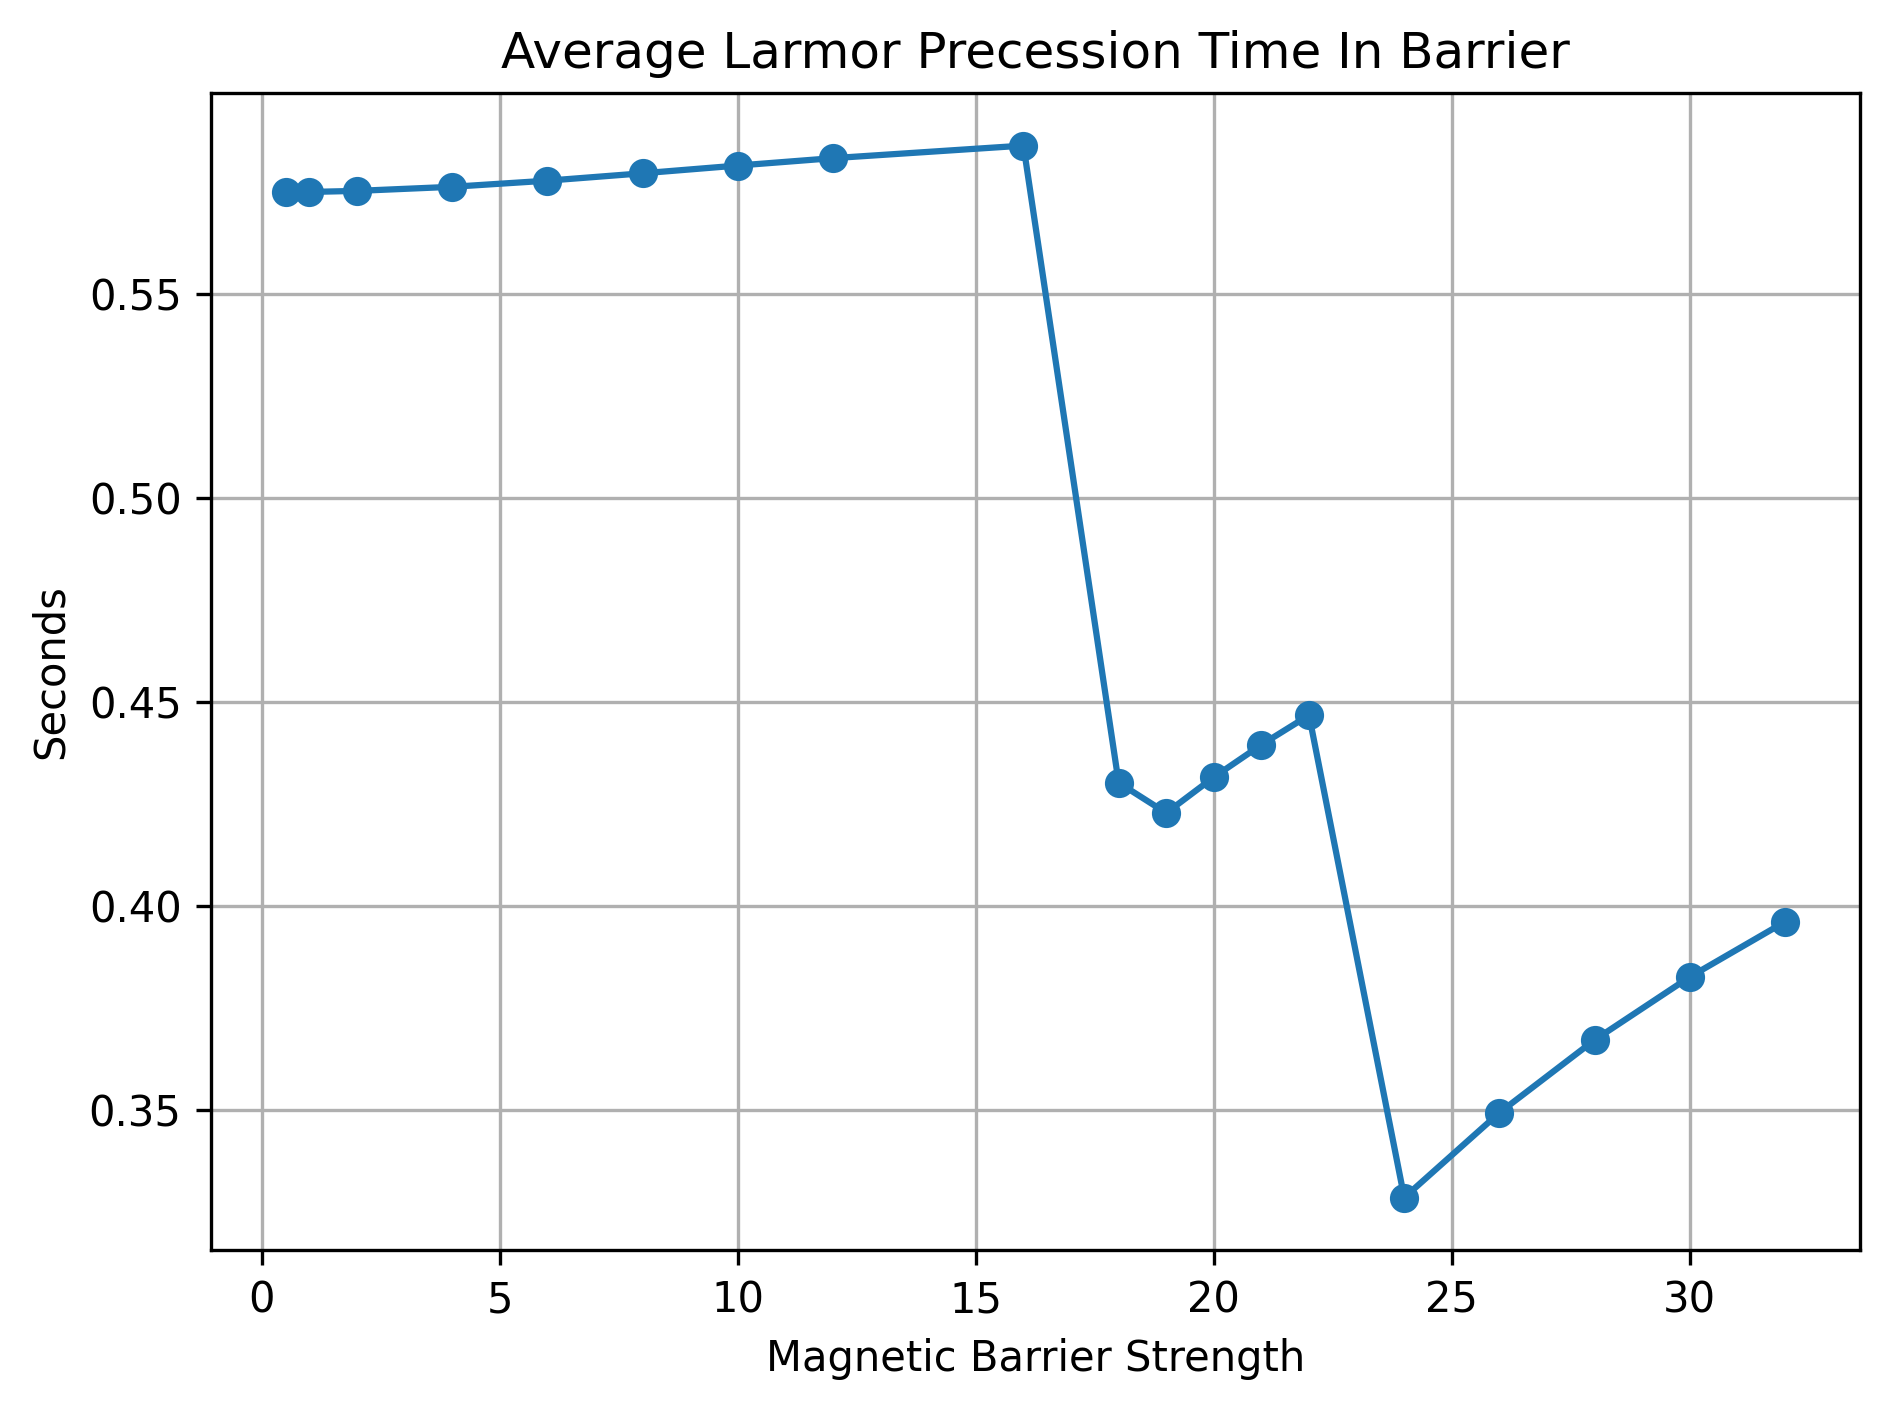

In [47]:
# Data provided by the user
x, y = zip(*data_larmor)

# Create the plot
plt.figure(dpi=300)
plt.plot(x, y, marker='o')
plt.xlabel('Magnetic Barrier Strength')
plt.ylabel('Seconds')
plt.title('Average Larmor Precession Time In Barrier')
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/yj/gnbff_r55s7fw6ylhj7q526r0000gn/T/ipykernel_23337/1987484957.py:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(x_bohmian, y_bohmian, yerr=y_bohmian_std, marker='o', capsize=5, capthick=1,


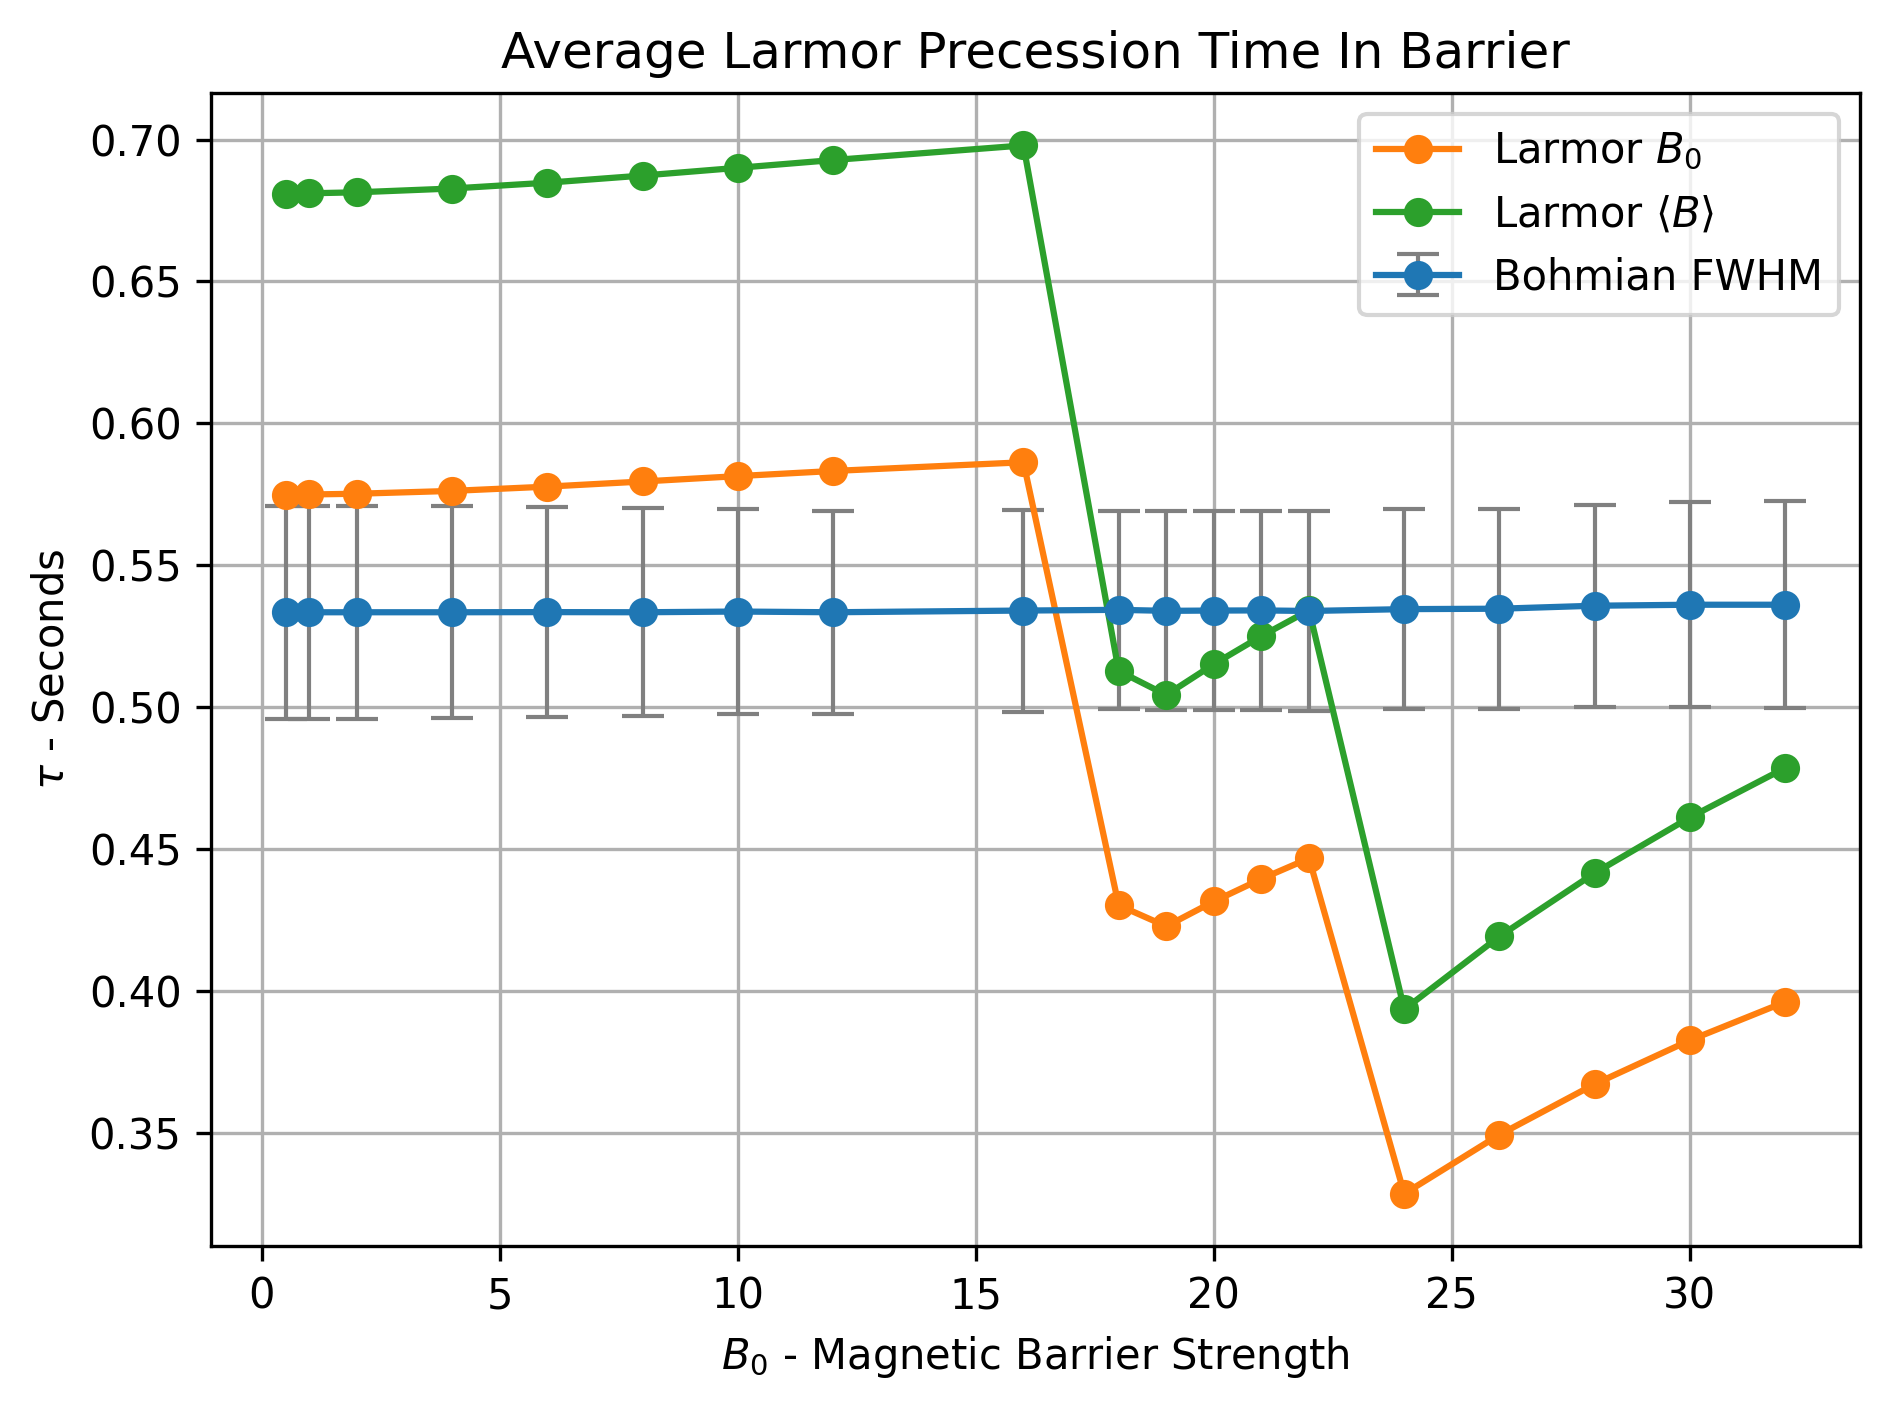

In [54]:
# combined
# Data provided by the user

x_bohmian, y_bohmian = zip(*data_bohmian[2.35482])
x_bohmian_std, y_bohmian_std = zip(*data_bohmian_std[2.35482])
x_larmor, y_larmor = zip(*data_larmor)
x_larmor_avg, y_larmor_avg = zip(*data_larmor_avg)

# Create the plot
plt.figure(dpi=300)
plt.errorbar(x_bohmian, y_bohmian, yerr=y_bohmian_std, marker='o', capsize=5, capthick=1, 
             ecolor='gray', elinewidth=1, fmt='-o', label='Bohmian FWHM')
plt.plot(x_larmor, y_larmor, marker='o', label='Larmor $B_0$')
plt.plot(x_larmor_avg, y_larmor_avg, marker='o', label='Larmor $\langle B \\rangle$')
plt.xlabel('$B_0$ - Magnetic Barrier Strength')
plt.ylabel('$\\tau$ - Seconds')
plt.legend()
plt.title('Average Larmor Precession Time In Barrier')
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/yj/gnbff_r55s7fw6ylhj7q526r0000gn/T/ipykernel_23337/4137413110.py:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(x_bohmian, y_bohmian, yerr=y_bohmian_std, marker='o', capsize=5, capthick=1,


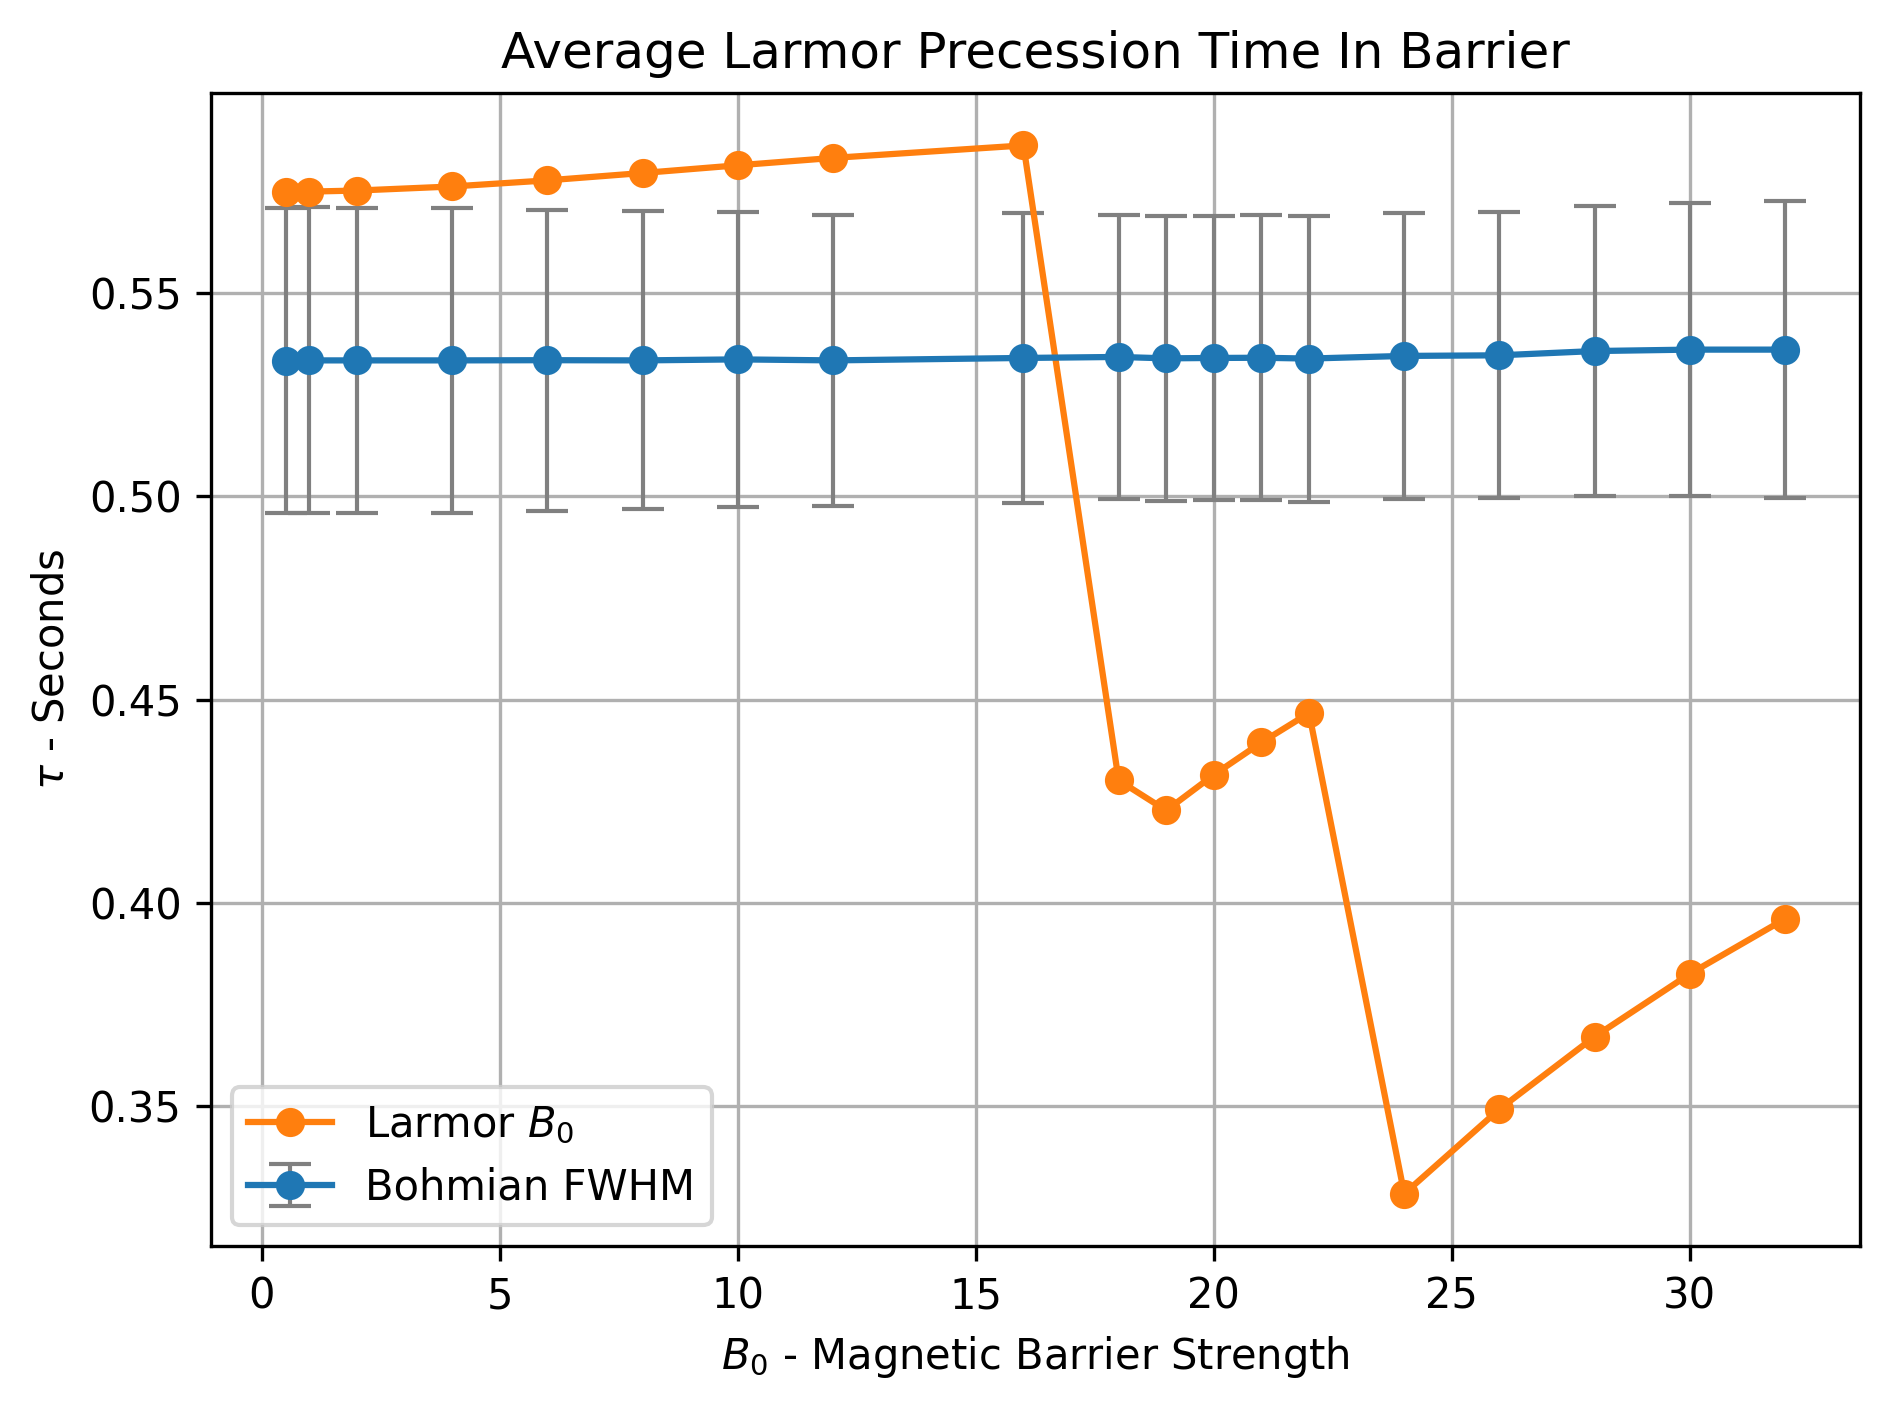

In [57]:
# combined
# Data provided by the user

x_bohmian, y_bohmian = zip(*data_bohmian[2.35482])
x_bohmian_std, y_bohmian_std = zip(*data_bohmian_std[2.35482])
x_larmor, y_larmor = zip(*data_larmor)
x_larmor_avg, y_larmor_avg = zip(*data_larmor_avg)

# Create the plot
plt.figure(dpi=300)
plt.errorbar(x_bohmian, y_bohmian, yerr=y_bohmian_std, marker='o', capsize=5, capthick=1, 
             ecolor='gray', elinewidth=1, fmt='-o', label='Bohmian FWHM')
plt.plot(x_larmor, y_larmor, marker='o', label='Larmor $B_0$')
plt.xlabel('$B_0$ - Magnetic Barrier Strength')
plt.ylabel('$\\tau$ - Seconds')
plt.legend()
plt.title('Average Larmor Precession Time In Barrier')
plt.grid(True)
plt.tight_layout()
plt.show()


In [59]:
# At what bohmian thickness do we correspond with B_0?
y_larmor[0]

0.5748436827748745

Next Steps:
- Ensuring different integration technique - integration of change, not integration of last and first of w_L (I've did that before)
- Compare results with each other

# Weak Field Simulations

## Circular Barrier

In [12]:
data_sets = {
	"circular_barrier": {
		1e-1: "simulation_20250514_02-09_512_circular_mag_strength_0.1.pkl",
		1e-2: "simulation_20250514_01-57_512_circular_mag_strength_0.01.pkl",
		1e-3: "simulation_20250514_01-44_512_circular_mag_strength_0.001.pkl",
		1e-4: "simulation_20250514_01-30_512_circular_mag_strength_0.0001.pkl",
		1e-5: "simulation_20250514_01-18_512_circular_mag_strength_1e-05.pkl",
		1e-6: "simulation_20250514_01-04_512_circular_mag_strength_1e-06.pkl",
		1e-7: "simulation_20250514_00-54_512_circular_mag_strength_1e-07.pkl",
	},
	"gaussian_barrier": {
		1e-1: "simulation_20250514_00-42_512_gaussian_mag_strength_0.1.pkl",
		1e-2: "simulation_20250514_00-29_512_gaussian_mag_strength_0.01.pkl",
		1e-3: "simulation_20250514_00-17_512_gaussian_mag_strength_0.001.pkl",
		1e-4: "simulation_20250514_00-06_512_gaussian_mag_strength_0.0001.pkl",
		1e-5: "simulation_20250513_23-58_512_gaussian_mag_strength_1e-05.pkl",
		1e-6: "simulation_20250513_23-50_512_gaussian_mag_strength_1e-06.pkl",
		1e-7: "simulation_20250513_23-42_512_gaussian_mag_strength_1e-07.pkl",
	}
} 

In [7]:
data_results = {
	"circular_barrier": {
		"bohmian_trajectories": {

		},
		"precession": {
			
		},
	},
	"gaussian_barrier": {
		"bohmian_trajectories": {
			1: {},
			2.3548200450309493: {},
			2: {},
			3: {},
		},
		"precession": {

		}
	},
}

In [8]:
for mag_barrier_strength, filename in data_sets["circular_barrier"].items():
	print(f"Analyzing barrier strength: {mag_barrier_strength}")

	# retrieve simulation
	simulation_data, params, timestamp = load_simulation_data(f'./simulations_data/spin/{filename}')

	R = 1/2*params['mag_barrier_width']  # replace barrier_radius_value with your actual radius

	# calculate bohmian trajectories
	trajectories = compute_bohmian_trajectories(simulation_data, params,
										   alpha=1/np.sqrt(2),
										   beta=1/np.sqrt(2),
										   n_trajectories=200, random_seed=45000)

	t = simulation_data['t']
	dx = (simulation_data["x"][1] - simulation_data["x"][0])
	dy = (simulation_data["y"][1] - simulation_data["y"][0])

	# analyze barrier passage
	inside_mask, times_inside, avg_time_inside = analyze_barrier_passage(trajectories, t, R)
	print(f"Average time inside barrier: {avg_time_inside:.3f} (same units as t)")

	# Store results and free memory for trajectories analysis
	data_results["circular_barrier"]["bohmian_trajectories"][mag_barrier_strength] = {
		"times_inside": times_inside,
		"avg_time_inside": avg_time_inside
	}

	# plot trajectories and free memory
	fig, ax = plot_trajectories_with_barrier(trajectories, inside_mask, R)
	fig.savefig(f'./results/bohmian_trajectories/circular_barrier_strength_{mag_barrier_strength}.png', dpi=300, bbox_inches='tight')
	plt.close(fig)  # Clean up
	del trajectories, inside_mask, times_inside  # Free trajectory-related memory

	# precession
	precession_result = measure_precession_angle(
		simulation_data, dx=dx, dy=dy, hbar=1.0
	)
	# Free the large simulation data as it's no longer needed
	del simulation_data, t, dx, dy

	t_array, sx_array, sy_array, theta_array = precession_result
	del precession_result  # Free the tuple since we've unpacked it

	# Plot precession and free figure memory
	fig, axs = plot_precession(t_array, sx_array, sy_array, theta_array)
	fig.savefig(f'./results/spin_precession/circular_barrier_strength_{mag_barrier_strength}.png', dpi=300, bbox_inches='tight')
	plt.close(fig)  # Clean up

	# calculate larmor frequency
	w_l = calc_larmor_frequency(params)
	print(f"Larmor frequency: {w_l} rad/time unit, or {w_l/(2*np.pi)} Hz")

	# calculate tau
	tau = theta_array[-1] / calc_larmor_frequency(params)
	print(f"tau = {tau}")

	# save precession data and clean up remaining arrays
	data_results["circular_barrier"]["precession"][mag_barrier_strength] = {
		"t_array": t_array,
		"sx_array": sx_array,
		"sy_array": sy_array,
		"theta_array": theta_array,
		"time": tau
	}
	
	# Clean up remaining large arrays after storing results
	del t_array, sx_array, sy_array, theta_array, params

Analyzing barrier strength: 0.1
CFL parameter: 21051.363631746768
C after fix = 0.2499983805399469
Average time inside barrier: 0.171 (same units as t)
Larmor frequency: 0.2 rad/time unit, or 0.03183098861837907 Hz
tau = 0.17267058696030915
Analyzing barrier strength: 0.01
CFL parameter: 21051.363631746768
C after fix = 0.2499983805399469
Average time inside barrier: 0.171 (same units as t)
Larmor frequency: 0.02 rad/time unit, or 0.003183098861837907 Hz
tau = 0.1726662934097588
Analyzing barrier strength: 0.001
CFL parameter: 45209.4346478409
C after fix = 0.24999963861489785
Average time inside barrier: 0.171 (same units as t)
Larmor frequency: 0.002 rad/time unit, or 0.0003183098861837907 Hz
tau = 0.1726662504768153
Analyzing barrier strength: 0.0001
CFL parameter: 46778.039410267374
C after fix = 0.24999887453179298
Average time inside barrier: 0.171 (same units as t)
Larmor frequency: 0.0002 rad/time unit, or 3.183098861837907e-05 Hz
tau = 0.1726662500478106
Analyzing barrier stre

Save the results

In [9]:
import pickle
import datetime
import os

# # Create filename
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H-%M")
filename = os.path.join('./results/data', f'circular_barrier_weak_field_larmor_precession{timestamp}.pkl')

# Save to pickle file
with open(filename, 'wb') as f:
	pickle.dump(data_results, f)

# Load the data
# filename = os.path.join('./results/data', f'circular_barrier_resulting_larmor_precession20250512_12-04.pkl')
# data_results = pickle.load(open(filename, 'rb'))

Plot

In [1]:
# bohmian prepare data
data_bohmian = []
data_bohmian_std = []
for k, v in data_results['circular_barrier']['bohmian_trajectories'].items():
	
	times = v['times_inside'].mean()
	std = v['times_inside'].std()

	data_bohmian.append([k, times])
	data_bohmian_std.append([k, std])

# larmor clock data prep

data = []
for k, v in data_results['circular_barrier']['precession'].items():
	
	# time = v['time']
	# print(k, time)
	# data.append([k, time])

	mag_barrier = k

	# time = v['time']
	theta_array = np.unwrap(v['theta_array'][:250])

	# calculate larmor frequency
	w_l = 2 * k / 1 # hbar = 1
	print(f"Larmor frequency: {w_l} rad/time unit, or {w_l/(2*np.pi)} Hz")

	# calculate tau
	total_precession = np.sum(np.abs(np.diff(theta_array)))

	tau = total_precession / w_l
	print(f"tau = {tau} - {(total_precession)}")

	print(k, tau)
	data.append([k, tau])

# Data provided by the user
x, y = zip(*data_bohmian)
x_std, y_std = zip(*data_bohmian_std)

# Create the plot
plt.figure()
plt.errorbar(x, y, yerr=y_std, marker='o', capsize=5, capthick=1, 
             ecolor='gray', elinewidth=1, fmt='-o', label='Data with Error Bars')

x_larmor, y_larmor = zip(*data)
plt.plot(x_larmor, y_larmor, marker='o', label='Larmor')
plt.xlabel('$B_0$ - Magnetic Barrier Strength')
plt.ylabel('$\\tau$ - Seconds')
plt.ylim(0, 0.3)
plt.xscale('log')
plt.title('Average Tunneling Time Via Bohmian Trajectories')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'data_results' is not defined

In [86]:
print (f"Larmor average = {np.mean(y_larmor)}, with std = {np.std(y_larmor)}")

Larmor average = 0.17265305770081923, with std = 1.5150534466605625e-06


In [88]:
print (f"Bohmian average = {np.mean(y)}, with std = {np.std(y)}")

Bohmian average = 0.17094999999999996, with std = 2.7755575615628914e-17


In [91]:
1 - np.mean(y) / np.mean(y_larmor)

0.009864045986202052

/var/folders/yj/gnbff_r55s7fw6ylhj7q526r0000gn/T/ipykernel_92857/3318635117.py:9: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(x_bohmian, y_bohmian, yerr=y_bohmian_std, marker='o', capsize=5, capthick=1,


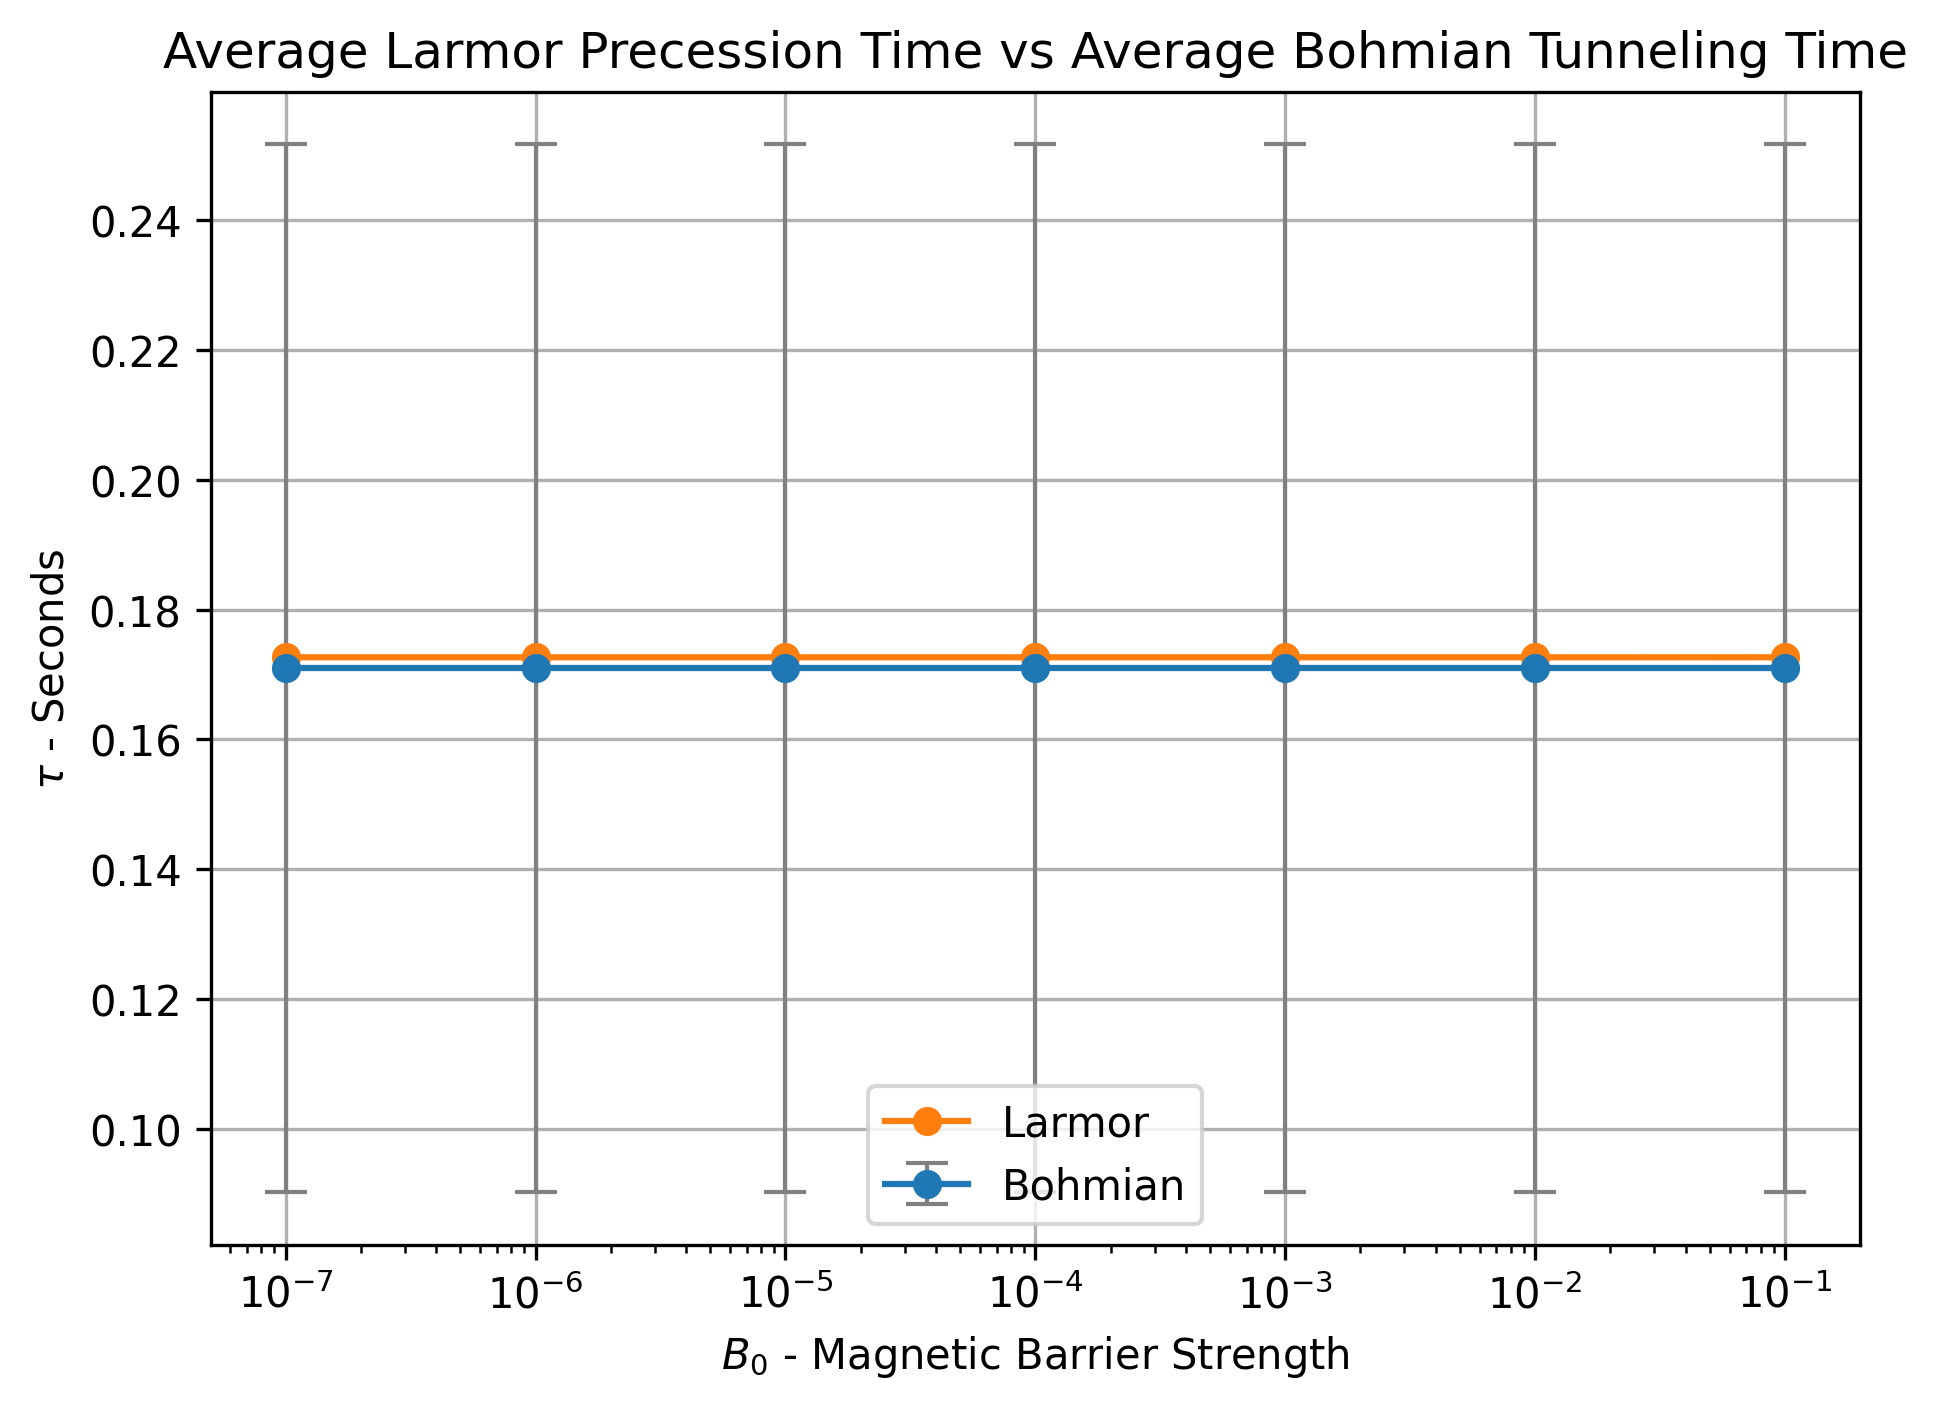

In [94]:
# together
# Data provided by the user
x_bohmian, y_bohmian = zip(*data_bohmian)
x_bohmian_std, y_bohmian_std = zip(*data_bohmian_std)
x_larmor, y_larmor = zip(*data)

# Create the plot
plt.figure(dpi=300)
plt.errorbar(x_bohmian, y_bohmian, yerr=y_bohmian_std, marker='o', capsize=5, capthick=1, 
             ecolor='gray', elinewidth=1, fmt='-o', label='Bohmian')
plt.plot(x_larmor, y_larmor, marker='o', label='Larmor')
plt.xlabel('$B_0$ - Magnetic Barrier Strength')
plt.ylabel('$\\tau$ - Seconds')
plt.xscale('log')
plt.title('Average Larmor Precession Time vs Average Bohmian Tunneling Time')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()


## Gaussian Barrier

In [13]:
data_results_gaussian = {
	"gaussian_barrier": {
		"bohmian_trajectories": {
			1: {},
			2.3548200: {},  # FWHM
			2: {},
			3: {},
		},
		"precession": {

		}
	},
}

In [14]:
for mag_barrier_strength, filename in data_sets["gaussian_barrier"].items():
	print(f"Analyzing barrier strength: {mag_barrier_strength}")

	# retrieve simulation
	simulation_data, params, timestamp = load_simulation_data(f'./simulations_data/spin/{filename}')

	# calculate bohmian trajectories
	trajectories = compute_bohmian_trajectories(simulation_data, params,
										   alpha=1/np.sqrt(2),
										   beta=1/np.sqrt(2),
										   n_trajectories=200, random_seed=777)

	t = simulation_data['t']
	dx = (simulation_data["x"][1] - simulation_data["x"][0])
	dy = (simulation_data["y"][1] - simulation_data["y"][0])

	# analyze barrier passage
	for sigma_multiplier in data_results_gaussian["gaussian_barrier"]["bohmian_trajectories"].keys():
		R = sigma_multiplier*params['mag_barrier_width'] / 2
		inside_mask, times_inside, avg_time_inside = analyze_barrier_passage(trajectories, t, R)
		print(f"Average time inside barrier: {avg_time_inside:.3f} (same units as t)")

		# Store results and free memory for trajectories analysis
		data_results_gaussian["gaussian_barrier"]["bohmian_trajectories"][sigma_multiplier][mag_barrier_strength] = {
			"times_inside": times_inside,
			"avg_time_inside": avg_time_inside
		}

		# plot trajectories and free memory
		fig, ax = plot_trajectories_with_barrier(trajectories, inside_mask, R)
		fig.savefig(f'./results/bohmian_trajectories/gaussian_barrier_strength_{mag_barrier_strength}_R_{R}.png', dpi=300, bbox_inches='tight')
		plt.close(fig)  # Clean up

	del trajectories, inside_mask, times_inside  # Free trajectory-related memory

	# precession
	precession_result = measure_precession_angle(
		simulation_data, dx=dx, dy=dy, hbar=1.0
	)
	# Free the large simulation data as it's no longer needed

	t_array, sx_array, sy_array, theta_array = precession_result
	del precession_result  # Free the tuple since we've unpacked it

	# Plot precession and free figure memory
	fig, axs = plot_precession(t_array, sx_array, sy_array, theta_array)
	fig.savefig(f'./results/spin_precession/gaussian_barrier_strength_{mag_barrier_strength}.png', dpi=300, bbox_inches='tight')
	plt.close(fig)  # Clean up

	# calculate larmor frequency
	w_l = calc_larmor_frequency(params)
	print(f"Larmor frequency: {w_l} rad/time unit, or {w_l/(2*np.pi)} Hz")

	# calculate tau
	tau = theta_array[-1] / w_l
	print(f"tau = {tau}")

	# calculate average magnetic barrier strength, and average larmor frequency
	# pick two frames that bracket the “packet fully in the barrier” period
	t0_idx, t1_idx = 160, 190

	B_avg, omega_avg = weighted_B_and_larmor(simulation_data, params,
											t0_idx, t1_idx, hbar=1.0)

	print(f"⟨B⟩  = {B_avg:.5f}  (simulation field units)")
	print(f"⟨ω_L⟩ = {omega_avg:.5f}  rad / time-unit")


	# save precession data and clean up remaining arrays
	data_results_gaussian["gaussian_barrier"]["precession"][mag_barrier_strength] = {
		"t_array": t_array,
		"sx_array": sx_array,
		"sy_array": sy_array,
		"theta_array": theta_array,
		"time": tau,
		# "time_b_averaged": tau_b_averaged, # re-calculated after from theta_array anyway
		"B_avg": B_avg,
		"omega_avg": omega_avg, # of average field
		"omega_0": w_l, # of space uniform field
	}
	
	# Clean up remaining large arrays after storing results
	del simulation_data, t, dx, dy
	del t_array, sx_array, sy_array, theta_array, params

Analyzing barrier strength: 0.1
CFL parameter: 21051.363631746768
C after fix = 0.2499983805399469
Average time inside barrier: 0.170 (same units as t)
Average time inside barrier: 0.533 (same units as t)
Average time inside barrier: 0.442 (same units as t)
Average time inside barrier: 0.698 (same units as t)
Larmor frequency: 0.1 rad/time unit, or 0.015915494309189534 Hz
tau = 0.5810391810101919
⟨B⟩  = 0.04221  (simulation field units)
⟨ω_L⟩ = 0.08442  rad / time-unit
Analyzing barrier strength: 0.01
CFL parameter: 39423.219957056346
C after fix = 0.24999980948460837
Average time inside barrier: 0.170 (same units as t)
Average time inside barrier: 0.533 (same units as t)
Average time inside barrier: 0.442 (same units as t)
Average time inside barrier: 0.698 (same units as t)
Larmor frequency: 0.01 rad/time unit, or 0.0015915494309189536 Hz
tau = 0.5810389814679758
⟨B⟩  = 0.00422  (simulation field units)
⟨ω_L⟩ = 0.00844  rad / time-unit
Analyzing barrier strength: 0.001
CFL parameter:

In [15]:
import pickle
import datetime
import os

# # Create filename
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H-%M")
filename = os.path.join('./results/data', f'gaussian_barrier_weak_field_larmor_precession{timestamp}.pkl')

# Save to pickle file
with open(filename, 'wb') as f:
	pickle.dump(data_results_gaussian, f)

# Load the data
# filename = os.path.join('./results/data', f'circular_barrier_resulting_larmor_precession20250512_12-04.pkl')
# data_results = pickle.load(open(filename, 'rb'))

/var/folders/yj/gnbff_r55s7fw6ylhj7q526r0000gn/T/ipykernel_92857/4258764795.py:33: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(x, y, yerr=y_std, marker='o', capsize=5, capthick=1,


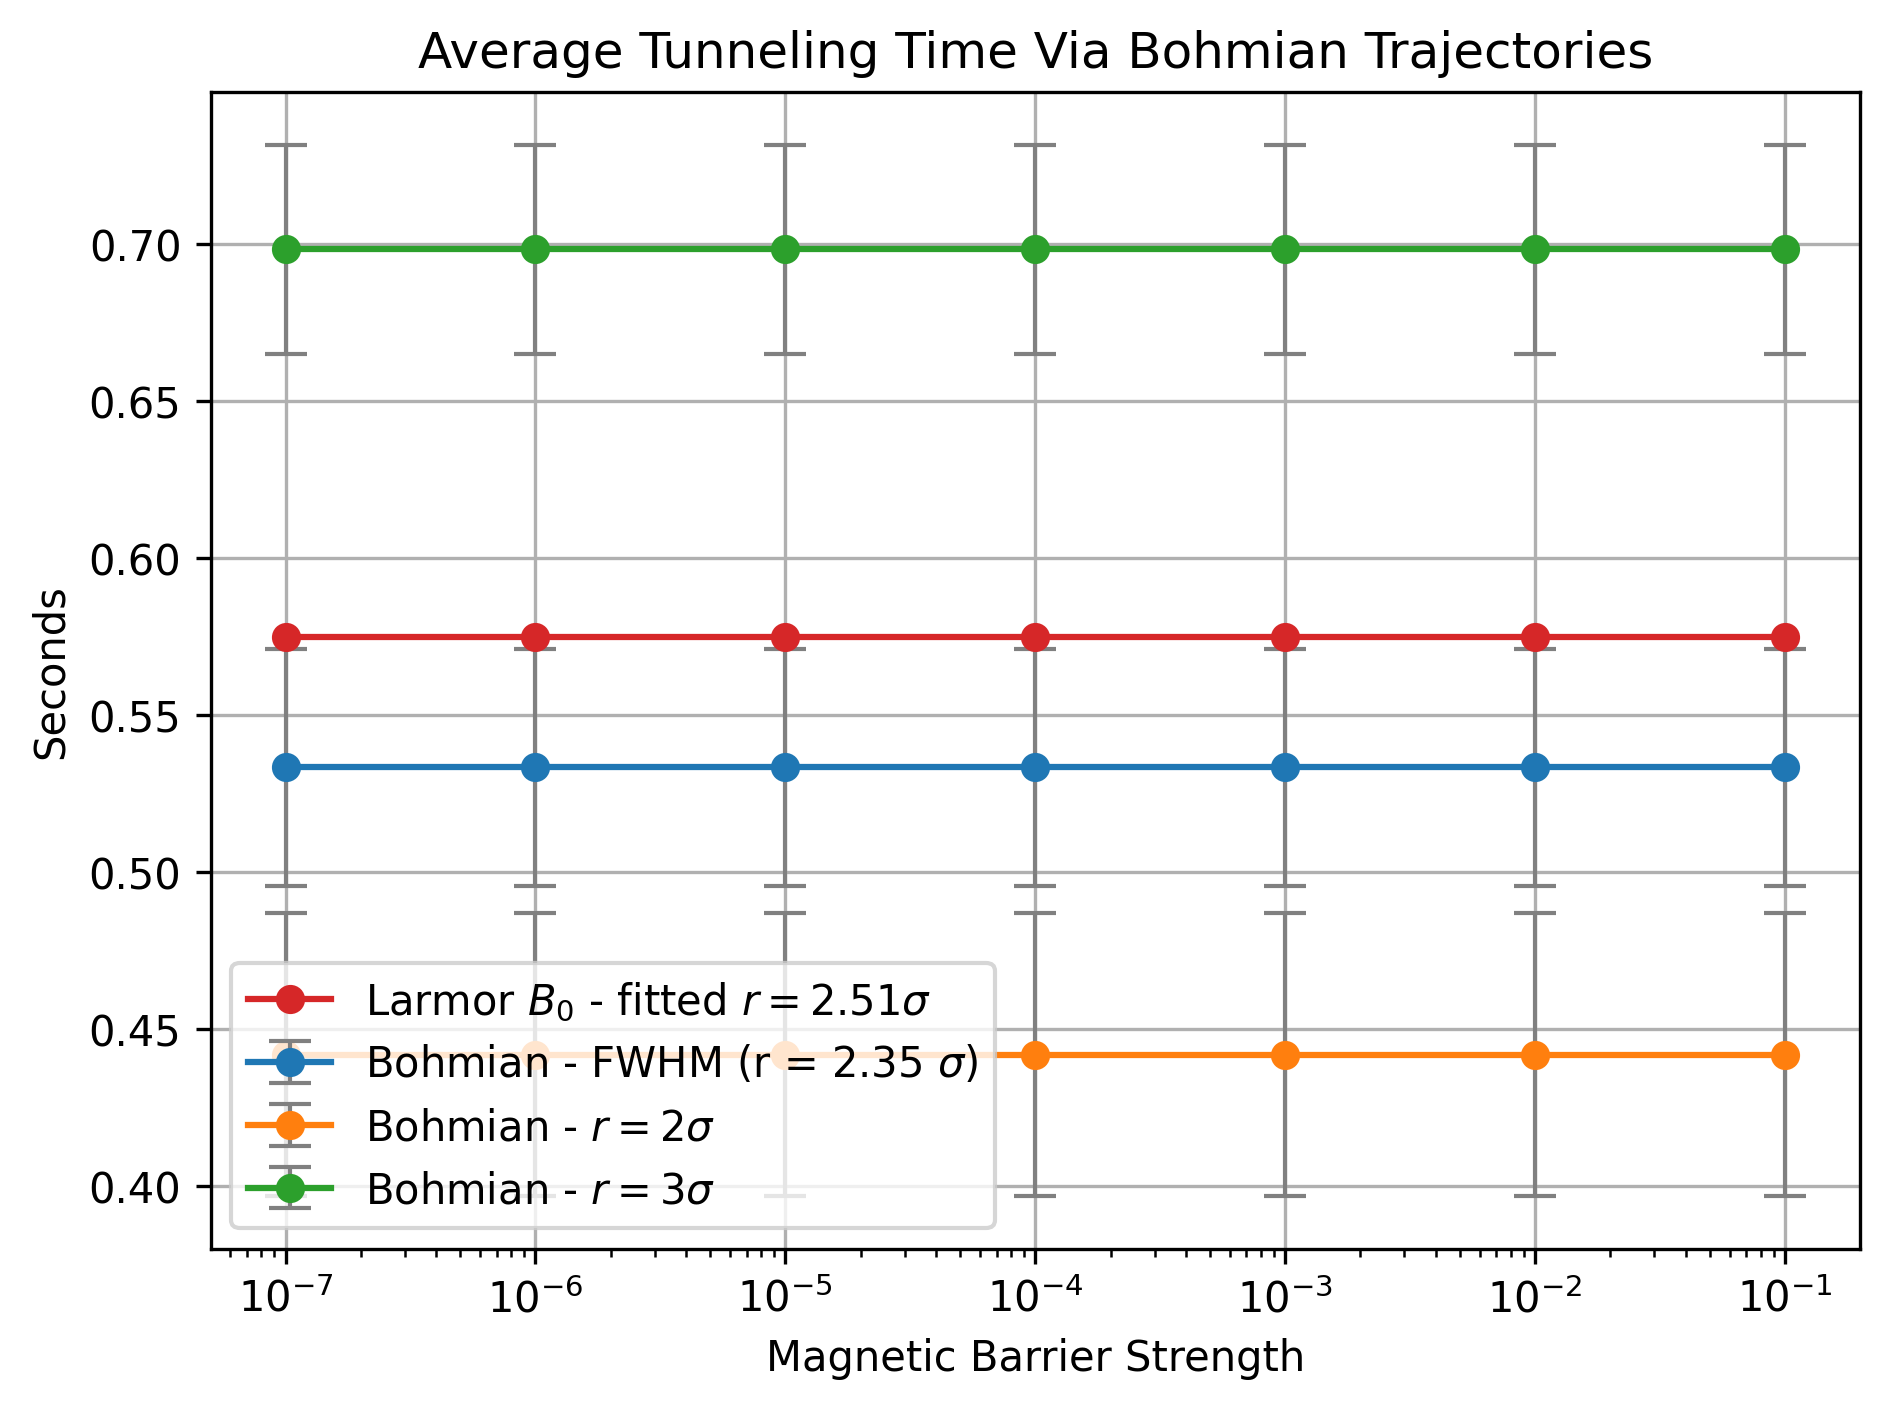

In [80]:
data_bohmian = {

}

data_bohmian_std = {

}

for sigma_factor, value in data_results_gaussian['gaussian_barrier']['bohmian_trajectories'].items():
	data_bohmian[sigma_factor] = []
	data_bohmian_std[sigma_factor] = []
	for k, v in value.items():
		time = v['avg_time_inside']
		std_bohm = np.std(v['times_inside'])
		data_bohmian[sigma_factor].append([k, time])
		data_bohmian_std[sigma_factor].append([k, std_bohm])

x_larmor, y_larmor = zip(*data_larmor)
x_larmor_avg, y_larmor_avg = zip(*data_larmor_avg)

# Create the plot
plt.figure(dpi=300)

for d, xy in data_bohmian.items():

	if d == 1:
		continue

	x, y = zip(*xy)
	_, y_std = zip(*(data_bohmian_std[d]))

	label = 'Bohmian - FWHM (r = 2.35 $\sigma$)' if d == 2.35482 else f'Bohmian - $r = {d}\sigma$'
	plt.errorbar(x, y, yerr=y_std, marker='o', capsize=5, capthick=1, 
             ecolor='gray', elinewidth=1, fmt='-o', label=f'{label}')
	# break

plt.plot(x_larmor, np.array(y_larmor)*2, marker='o', label=f'Larmor $B_0$ - fitted $r = {2.51}\sigma$')

plt.xlabel('Magnetic Barrier Strength')
plt.ylabel('Seconds')
plt.xscale('log')
plt.title('Average Tunneling Time Via Bohmian Trajectories')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [22]:
data_larmor = []
data_larmor_avg = []
for k, v in data_results_gaussian['gaussian_barrier']['precession'].items():
	
	mag_barrier = k

	time = v['time']
	theta_array = np.unwrap(v['theta_array'][:250])

	# calculate larmor frequency
	w_l = 2 * k / 1 # hbar = 1
	print(f"Larmor frequency: {w_l} rad/time unit, or {w_l/(2*np.pi)} Hz")

	w_l_avg = v['omega_avg']

	# calculate tau

	theta_0 = np.sum(np.abs(np.diff(theta_array)))
	theta_1 = theta_array[-1] - theta_array[0]

	tau = (theta_0) / w_l
	tau_avg = (theta_0) / w_l_avg
	print(f"tau = {tau} - {(theta_array[-1] - theta_array[0])}")

	print(k, tau)
	data_larmor.append([k, tau])
	data_larmor_avg.append([k, tau_avg])

Larmor frequency: 0.2 rad/time unit, or 0.03183098861837907 Hz
tau = 0.2874108801297571 - 0.057482176025951424
0.1 0.2874108801297571
Larmor frequency: 0.02 rad/time unit, or 0.003183098861837907 Hz
tau = 0.2874107704336109 - 0.005748215408672219
0.01 0.2874107704336109
Larmor frequency: 0.002 rad/time unit, or 0.0003183098861837907 Hz
tau = 0.2874107693370565 - 0.000574821538674113
0.001 0.2874107693370565
Larmor frequency: 0.0002 rad/time unit, or 3.183098861837907e-05 Hz
tau = 0.2874107693313074 - 5.748215386626148e-05
0.0001 0.2874107693313074
Larmor frequency: 2e-05 rad/time unit, or 3.183098861837907e-06 Hz
tau = 0.28741076930869136 - 5.748215386173828e-06
1e-05 0.28741076930869136
Larmor frequency: 2e-06 rad/time unit, or 3.1830988618379064e-07 Hz
tau = 0.28741076929159054 - 5.748215385831811e-07
1e-06 0.28741076929159054
Larmor frequency: 2e-07 rad/time unit, or 3.183098861837907e-08 Hz
tau = 0.28741076417741285 - 5.748215283548257e-08
1e-07 0.28741076417741285


/var/folders/yj/gnbff_r55s7fw6ylhj7q526r0000gn/T/ipykernel_92857/4110966986.py:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "-o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(x_bohmian, y_bohmian, yerr=y_bohmian_std, marker='o', capsize=5, capthick=1,


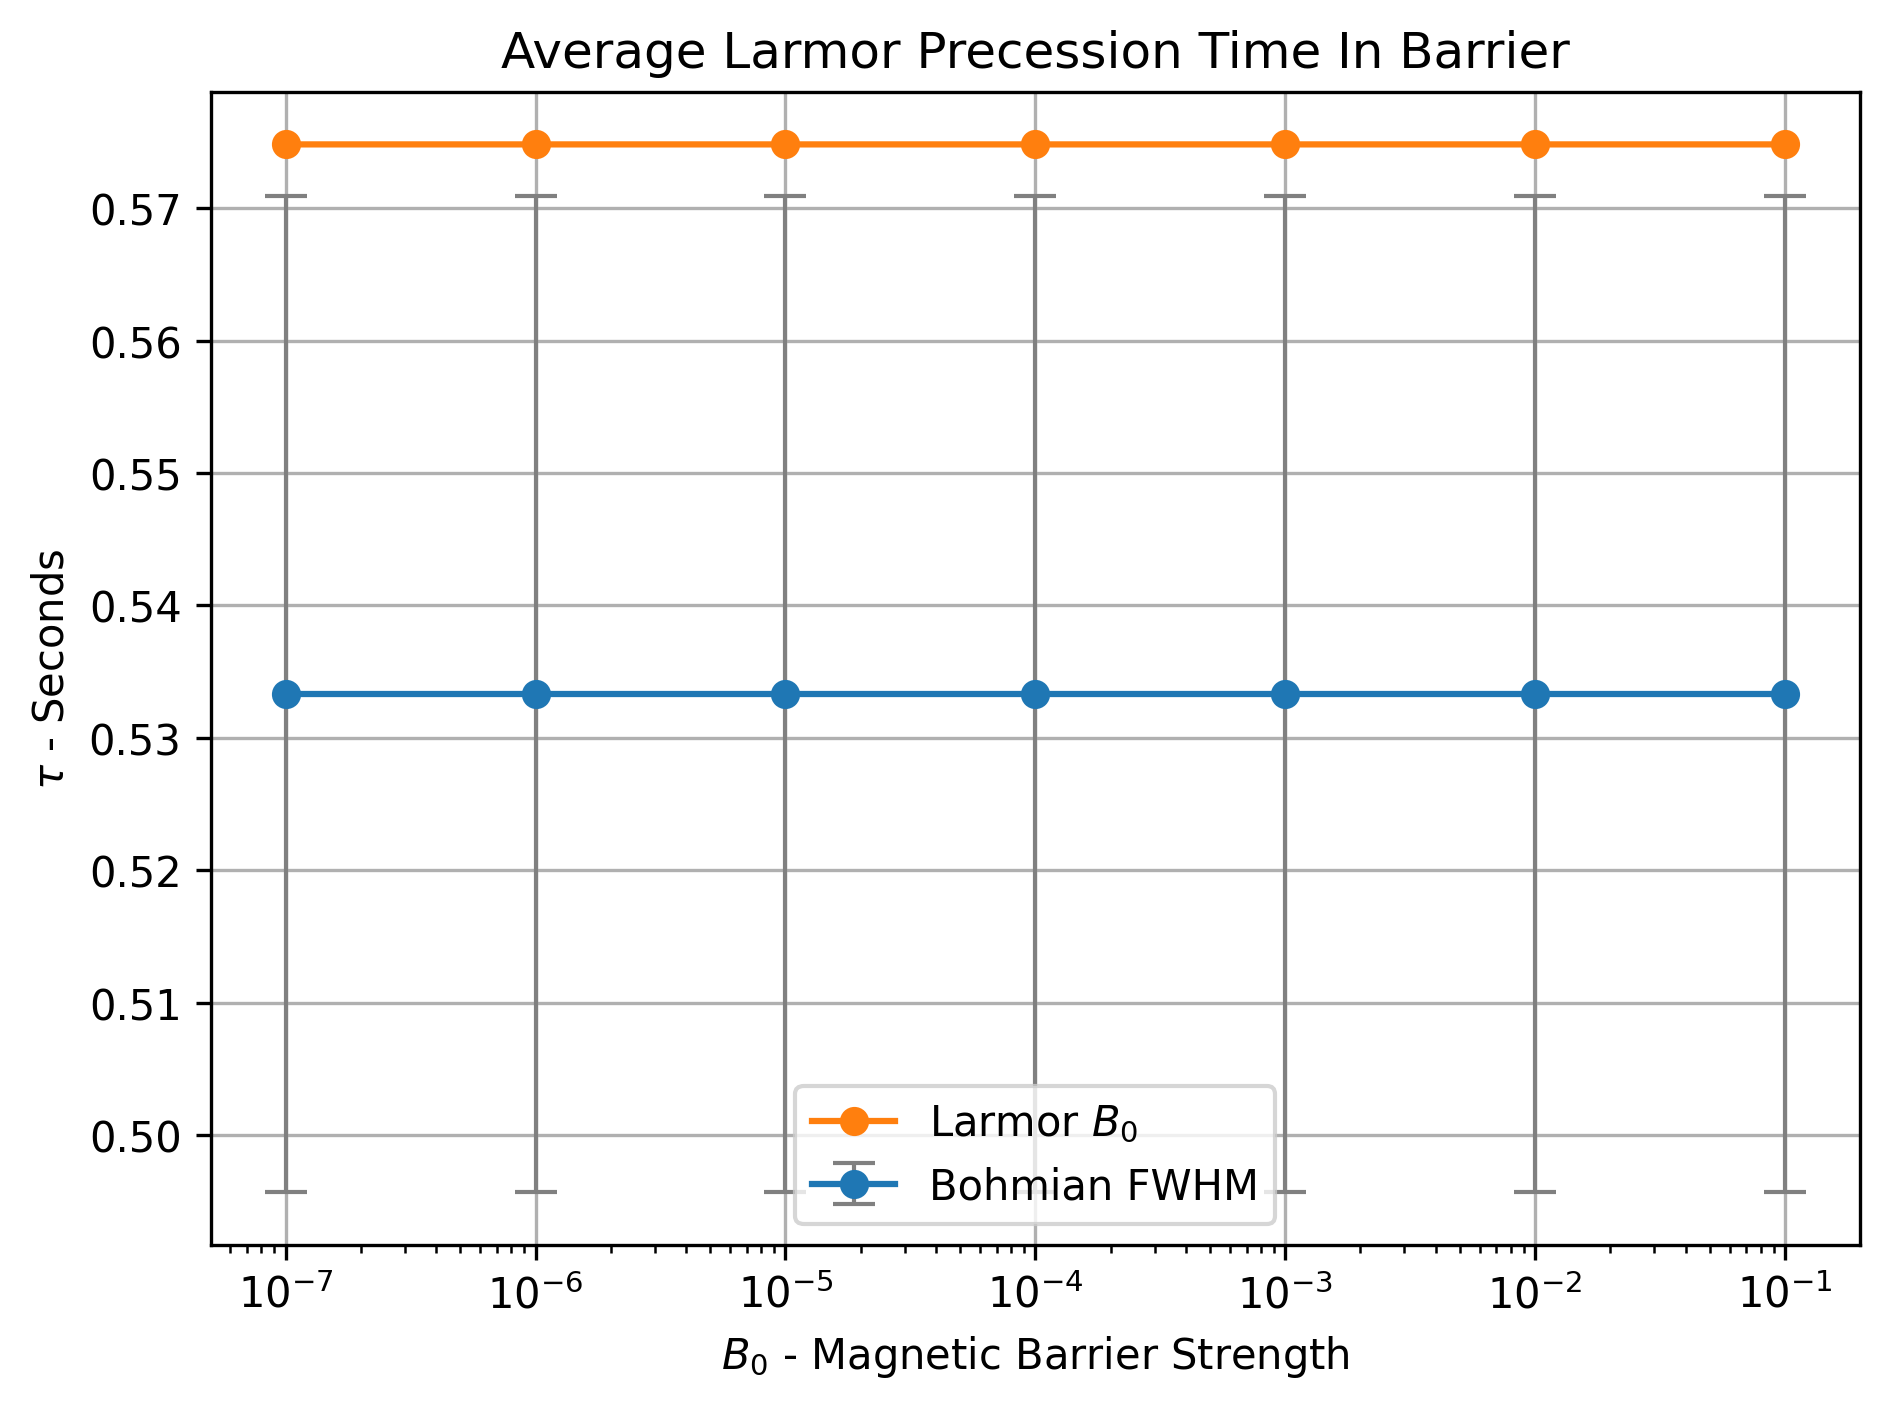

In [74]:
# combined
# Data provided by the user

x_bohmian, y_bohmian = zip(*data_bohmian[2.35482])
x_bohmian_std, y_bohmian_std = zip(*data_bohmian_std[2.35482])
x_larmor, y_larmor = zip(*data_larmor)
x_larmor_avg, y_larmor_avg = zip(*data_larmor_avg)

# Create the plot
plt.figure(dpi=300)
plt.errorbar(x_bohmian, y_bohmian, yerr=y_bohmian_std, marker='o', capsize=5, capthick=1, 
             ecolor='gray', elinewidth=1, fmt='-o', label='Bohmian FWHM')
plt.plot(x_larmor, np.array(y_larmor)*2, marker='o', label='Larmor $B_0$')
plt.xlabel('$B_0$ - Magnetic Barrier Strength')
plt.ylabel('$\\tau$ - Seconds')
plt.xscale('log')
plt.legend()
plt.title('Average Larmor Precession Time In Barrier')
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
target_tau =np.mean(np.array(y_larmor)*2)
target_tau

0.5748215691455505

In [38]:
np.std(np.array(y_larmor)*2)

7.811332384146537e-08

## Find Sigma Corresponding With Pathways

In [40]:
data_sets["gaussian_barrier"][1e-7]

'simulation_20250513_23-42_512_gaussian_mag_strength_1e-07.pkl'

In [41]:
# retrieve simulation
simulation_data, params, timestamp = load_simulation_data(f'./simulations_data/spin/{data_sets["gaussian_barrier"][1e-7]}')

# calculate bohmian trajectories
trajectories = compute_bohmian_trajectories(simulation_data, params,
										alpha=1/np.sqrt(2),
										beta=1/np.sqrt(2),
										n_trajectories=200, random_seed=777)

CFL parameter: 46794.558884400714
C after fix = 0.24999897896879836


In [57]:
# calculate bohmian trajectories
trajectories = compute_bohmian_trajectories(simulation_data, params,
										alpha=1/np.sqrt(2),
										beta=1/np.sqrt(2),
										n_trajectories=200, random_seed=777)

CFL parameter: 46794.558884400714
C after fix = 0.24999897896879836


In [69]:
sigma_bohmian = 5

tau_at_sigma = 0.4

t = simulation_data['t']
dx = (simulation_data["x"][1] - simulation_data["x"][0])
dy = (simulation_data["y"][1] - simulation_data["y"][0])

iterations = 0
max_iterations = 300

moving_gradient = 0.5

# analyze barrier passage
while np.abs(tau_at_sigma-target_tau) > 1e-4:



	inside_mask, times_inside, avg_time_inside = analyze_barrier_passage(trajectories, t, sigma_bohmian/2)
	tau_at_sigma = avg_time_inside

	print(f"Average time inside barrier: {avg_time_inside:.3f} (same units as t)")

	sigma_bohmian -= moving_gradient * (tau_at_sigma-target_tau)

	del inside_mask, times_inside  # Free trajectory-related memory
	iterations+=1

	if (iterations > max_iterations):
		break

Average time inside barrier: 0.239 (same units as t)
Average time inside barrier: 0.251 (same units as t)
Average time inside barrier: 0.262 (same units as t)
Average time inside barrier: 0.273 (same units as t)
Average time inside barrier: 0.282 (same units as t)
Average time inside barrier: 0.293 (same units as t)
Average time inside barrier: 0.302 (same units as t)
Average time inside barrier: 0.311 (same units as t)
Average time inside barrier: 0.320 (same units as t)
Average time inside barrier: 0.328 (same units as t)
Average time inside barrier: 0.338 (same units as t)
Average time inside barrier: 0.346 (same units as t)
Average time inside barrier: 0.354 (same units as t)
Average time inside barrier: 0.362 (same units as t)
Average time inside barrier: 0.368 (same units as t)
Average time inside barrier: 0.376 (same units as t)
Average time inside barrier: 0.382 (same units as t)
Average time inside barrier: 0.389 (same units as t)
Average time inside barrier: 0.395 (same units

In [ ]:
params

{'x_min': -20,
 'x_max': 20,
 'Nx': 512,
 'y_min': -20,
 'y_max': 20,
 'Ny': 512,
 'n_steps': 300,
 'dt': 0.01,
 'hbar': 1.0,
 'm': 1.0,
 'mag_barrier_center_x': 0.0,
 'mag_barrier_center_y': 0.0,
 'mag_barrier_strength': 5e-08,
 'mag_barrier_width': 4,
 'barrier_type': 'gaussian',
 'use_gravity': True,
 'g': 9.81,
 'x0': 0.0,
 'y0': 15.0,
 'p0x': 0.0,
 'p0y': 0.0,
 'sigma': 1.0}

In [44]:
sigma_bohmian

2

In [73]:
print (f"r = {sigma_bohmian/4} * sigma")

r = 2.51622673194165 * sigma


Average B

In [113]:
((2 * np.pi * params['mag_barrier_strength'] * 4**2) / (40**2))/(params['mag_barrier_strength'])

0.06283185307179587

In [114]:
params['mag_barrier_strength']

5e-08